Загрузка данных BTCUSDT из файла BTCUSDT_1m_01012025_05062025.csv...
Загружено 223020 строк данных после фильтрации по датам
Период: с 2025-01-01 03:01:00 по 2025-06-05 00:00:00

Данные после обработки: 222971 строк
Период анализа: с 2025-01-01 03:50:00 по 2025-06-05 00:00:00

Базовая статистика по данным:
               close           sma      deviation  pct_deviation  \
count  222971.000000  222971.00000  222971.000000  222971.000000   
mean    94320.718332   94319.52602       1.192312       0.001394   
std      8632.759773    8630.02194     261.233906       0.282404   
min     74584.200000   74960.07800   -3666.984000      -3.510292   
25%     85207.100000   85197.72600    -107.056000      -0.113414   
50%     95572.800000   95564.98800       2.090000       0.002217   
75%    102258.700000  102269.21700     112.428000       0.119460   
max    111898.500000  111705.43000    5797.198000       5.589994   

       abs_deviation  abs_pct_deviation            rsi     volatility  
count  

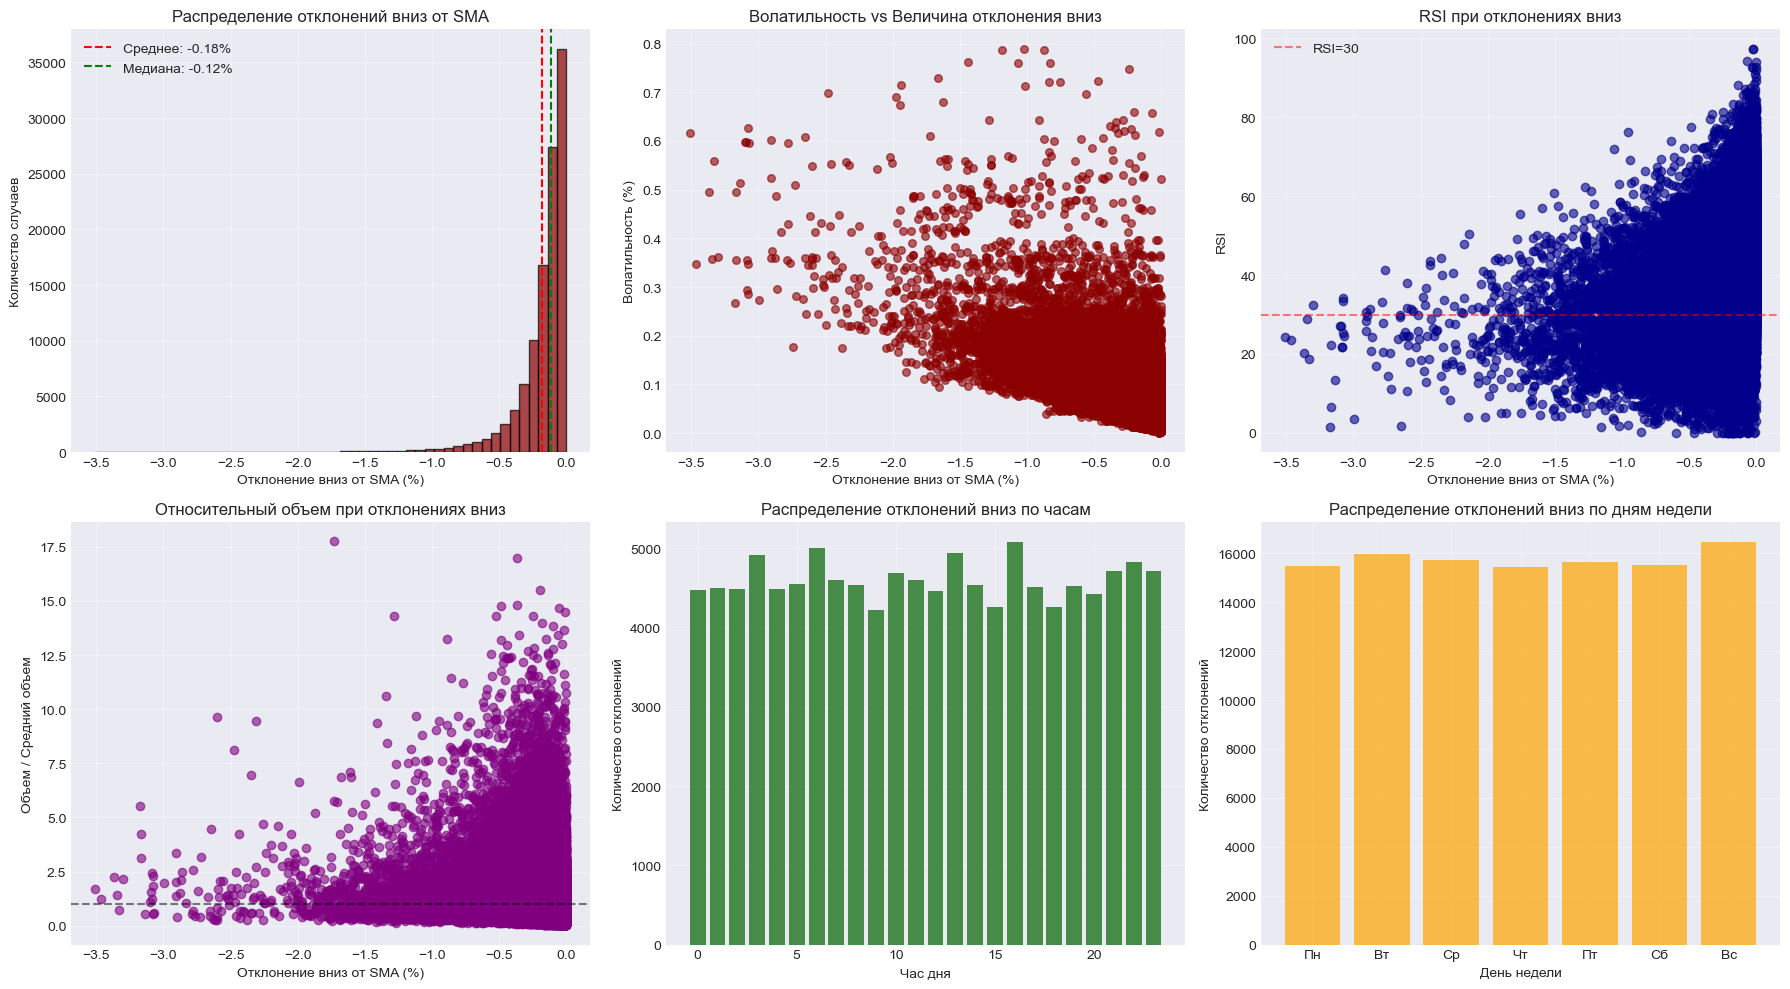



Статистика по группам отклонений вниз:
                       rsi  volatility  volume_ratio  deviation_pct
deviation_group                                                    
< -2%            24.664031    0.355575      1.930077            119
-2% to -1.5%     27.271815    0.272880      1.455412            272
-1.5% to -1%     28.656949    0.206987      1.466533           1020
-1% to -0.5%     31.023399    0.131313      1.448701           5599
> -0.5%          40.621260    0.053628      1.014488         103221

АНАЛИЗ ОТКЛОНЕНИЙ ВВЕРХ ОТ SMA
Найдено 112738 случаев отклонения вверх от SMA

Статистика отклонений вверх от SMA:
Минимальное отклонение: 0.000% (ближе к SMA)
Максимальное отклонение: 5.590% (дальше от SMA)
Среднее отклонение: 0.178%
Медианное отклонение: 0.118%
Стандартное отклонение: 0.218%

Средние показатели при отклонениях вверх:
RSI: 60.0
Волатильность: 0.057%
Объем/Средний объем: 1.02


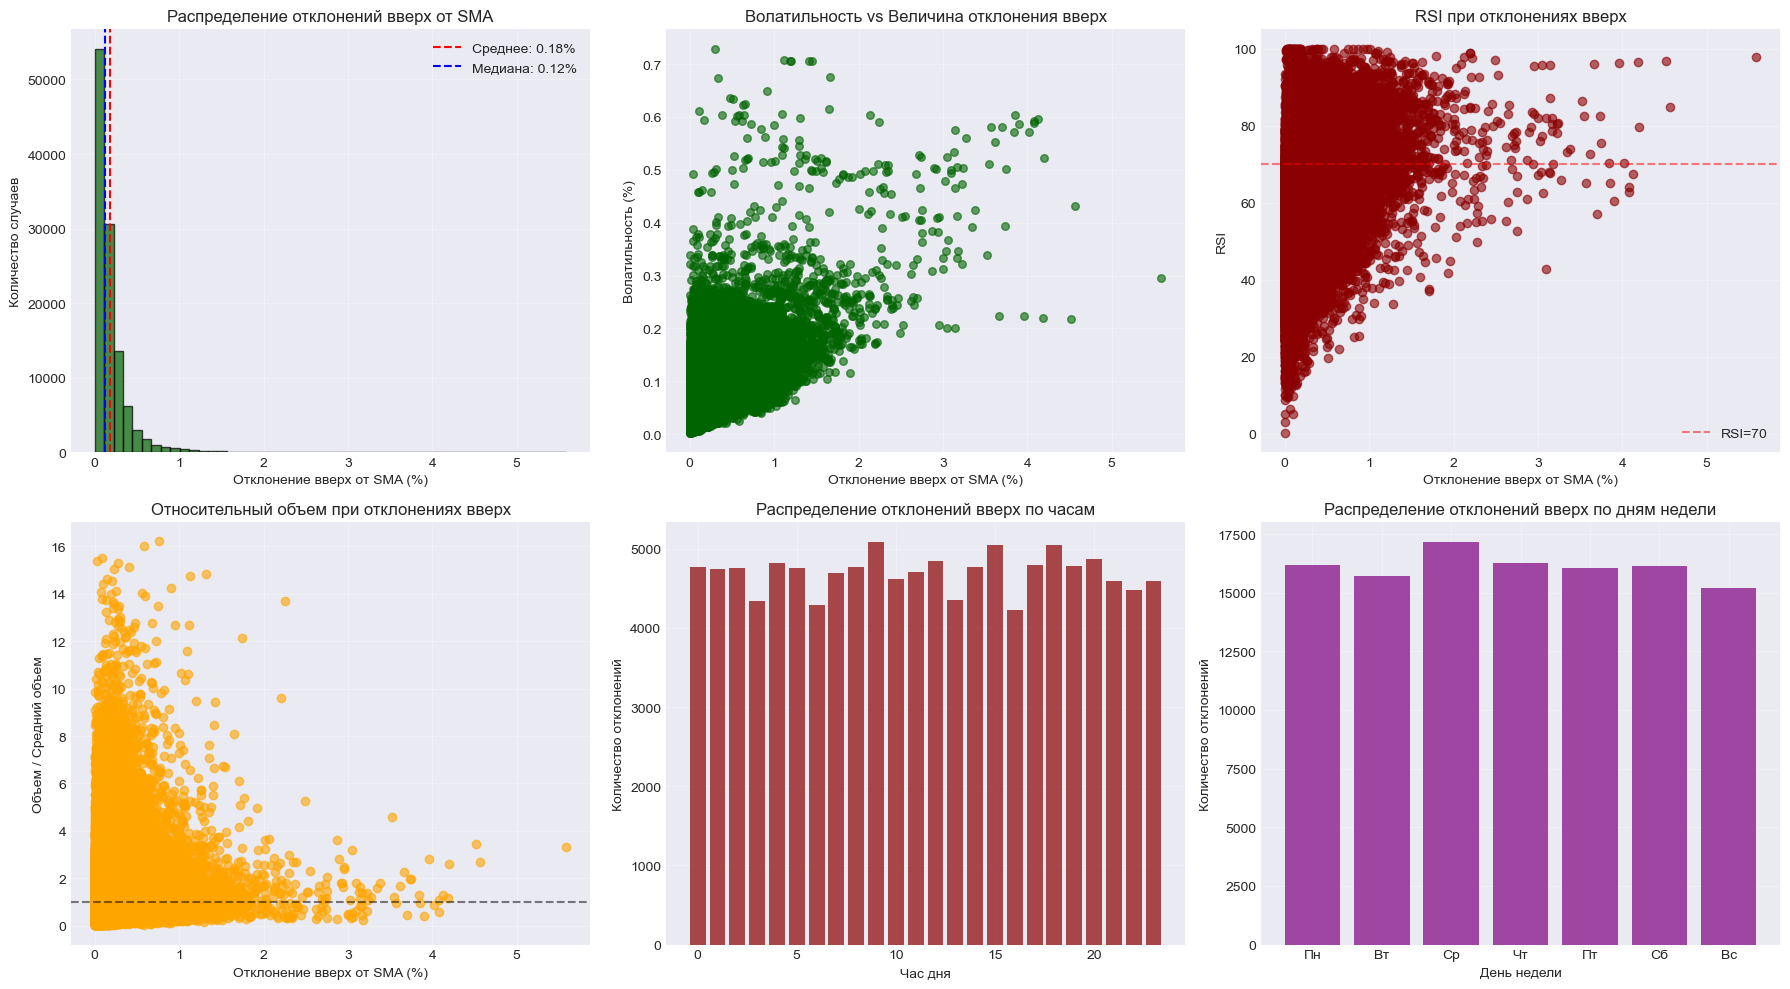



Статистика по группам отклонений вверх:
                       rsi  volatility  volume_ratio  deviation_pct
deviation_group                                                    
< 0.5%           59.366911    0.052195      0.998634         106006
0.5% to 1%       69.342520    0.122156      1.364616           5393
1% to 1.5%       73.820495    0.179233      1.455315           1004
1.5% to 2%       75.557874    0.235073      1.515625            196
> 2%             75.516440    0.364076      1.567277            139


1. ОБЩИЙ АНАЛИЗ ЧАСТОТЫ И АМПЛИТУДЫ ОТКЛОНЕНИЙ:


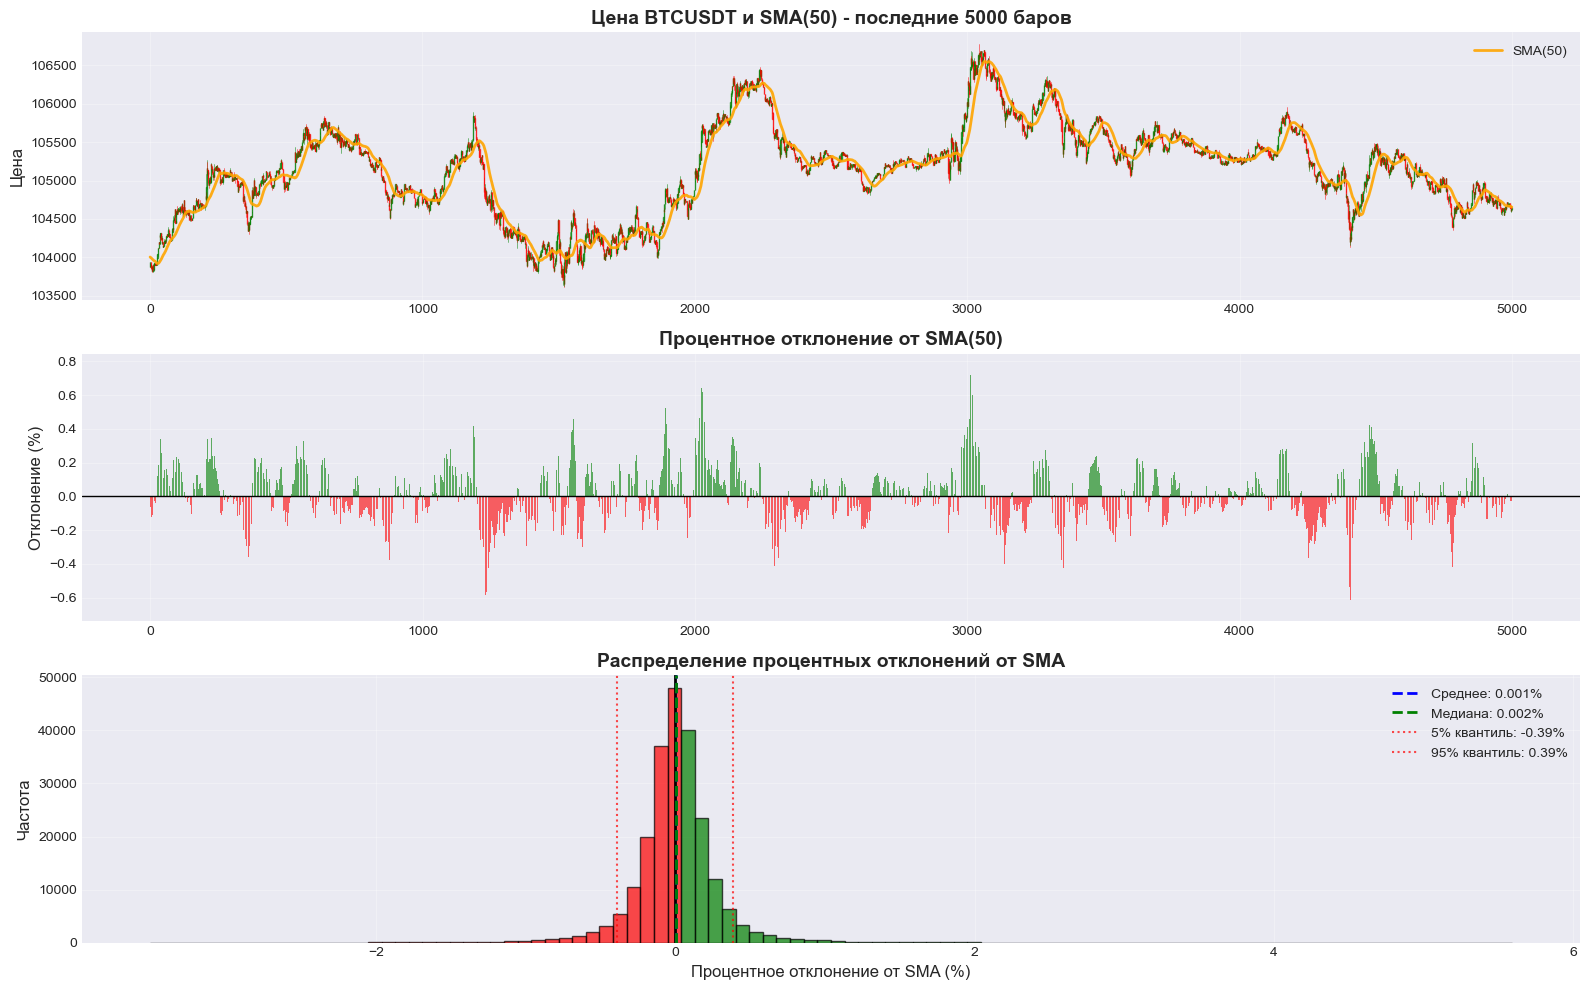


Детальная статистика отклонений:
Количество наблюдений: 222971
Среднее отклонение: 0.0014%
Стандартное отклонение: 0.2824%
Асимметрия (skewness): 0.1558
Эксцесс (kurtosis): 17.1703
Минимальное отклонение: -3.5103%
Максимальное отклонение: 5.5900%

Время нахождения выше SMA: 50.56%
Время нахождения ниже SMA: 49.44%

Тесты на нормальность распределения:
Jarque-Bera test: статистика = 2739762.0830, p-value = 0.000000
Shapiro-Wilk test: статистика = 0.8289, p-value = 0.000000
Распределение отклонений статистически отличается от нормального (есть 'толстые хвосты')


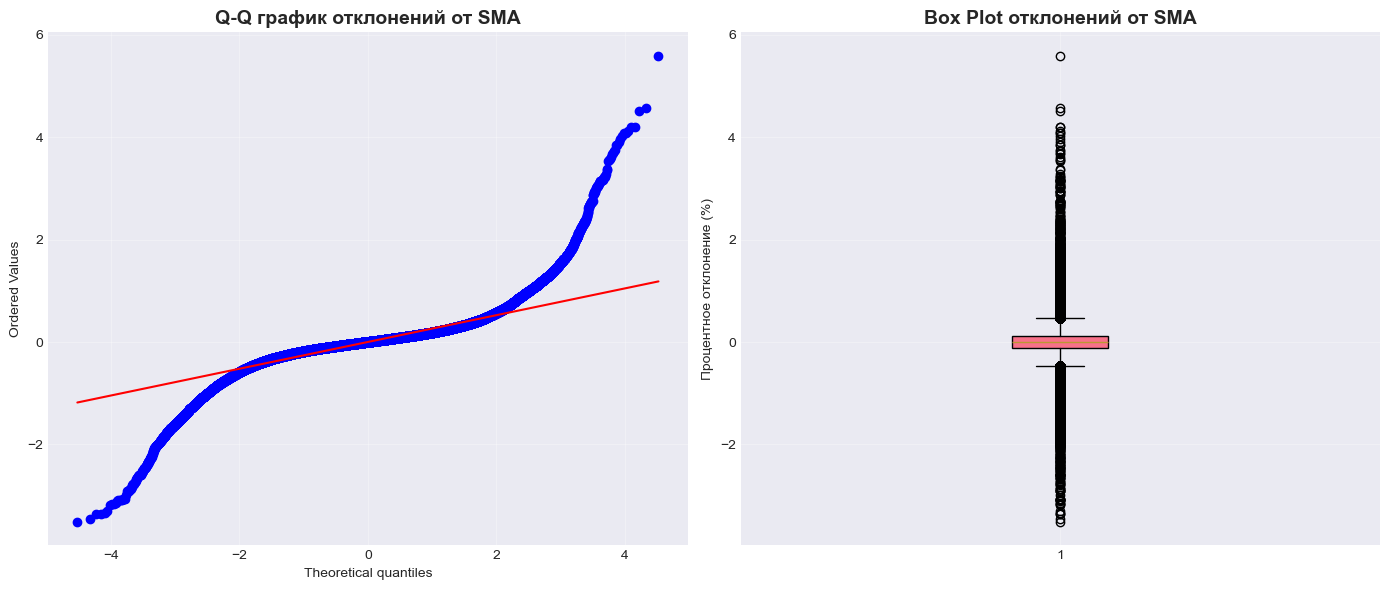


2. ИССЛЕДОВАНИЕ ВРЕМЕНИ ВОЗВРАТА К SMA ПОСЛЕ ЗНАЧИТЕЛЬНЫХ ОТКЛОНЕНИЙ:
Обнаружено 1498 значительных отклонений (>0.42%) с последующим возвратом к SMA

Статистика времени возврата:
Среднее время возврата: 23.8 минут
Медианное время возврата: 20.0 минут
Стандартное отклонение: 17.9 минут
Минимальное время: 1.0 минут
Максимальное время: 164.0 минут

Отклонения вверх: 739 случаев
  Среднее время возврата: 24.0 минут
  Средняя волатильность: 0.112%

Отклонения вниз: 759 случаев
  Среднее время возврата: 23.6 минут
  Средняя волатильность: 0.115%


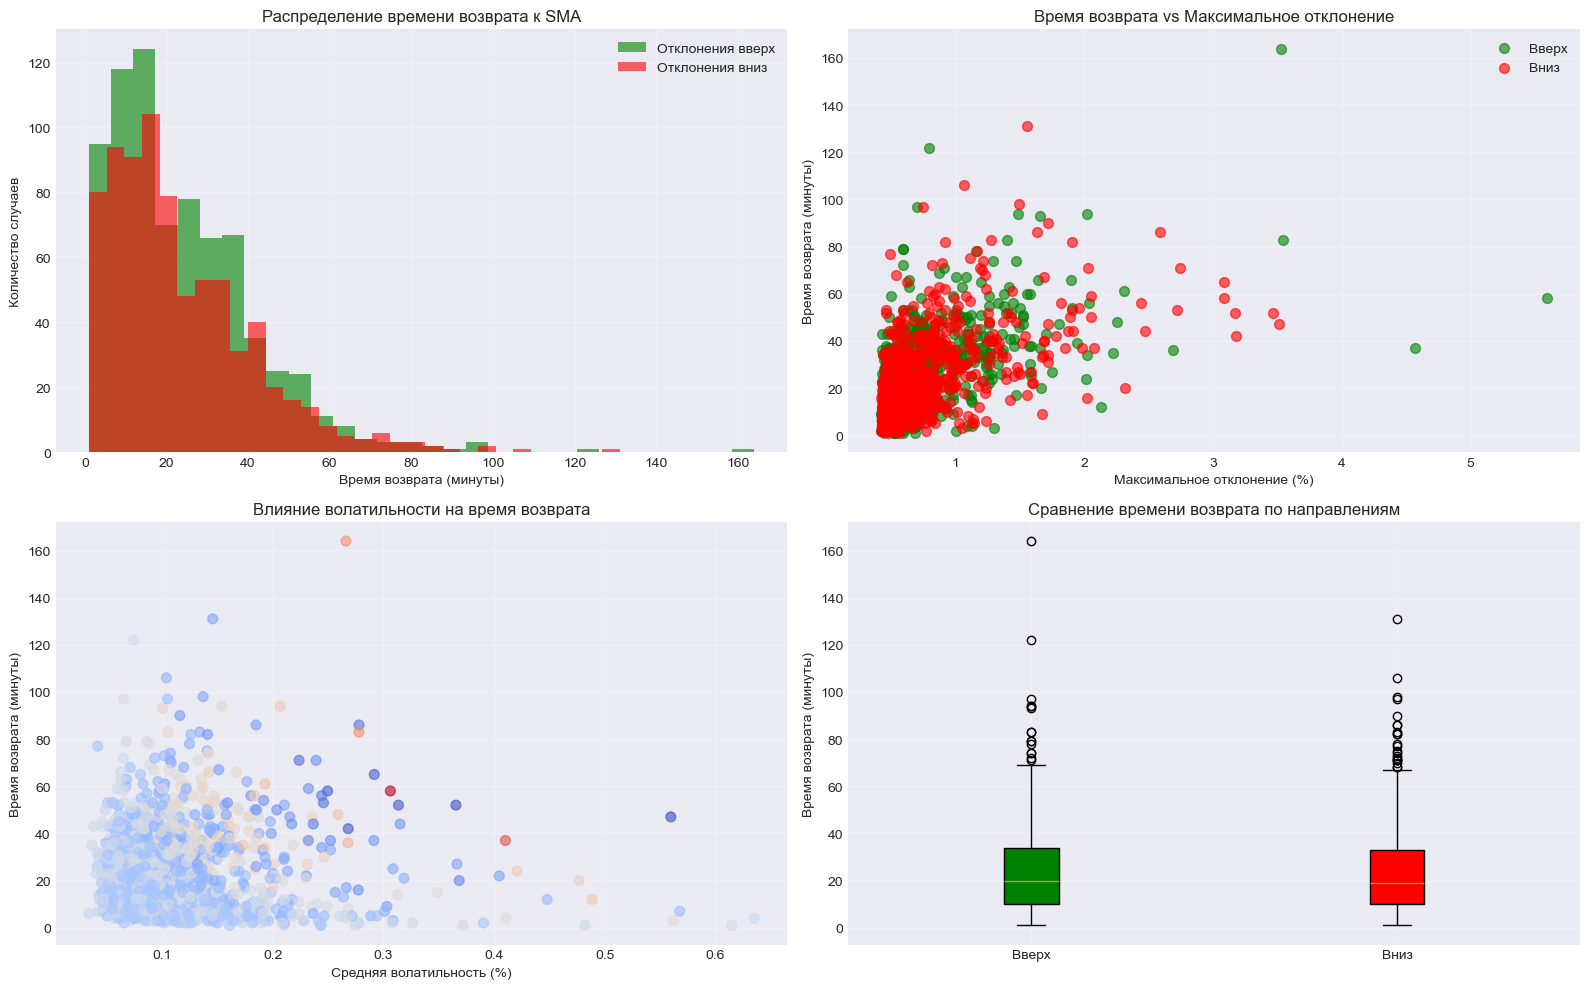


Анализ завершен. Все результаты сохранены и визуализированы.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pytz
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import mplfinance as mpf

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# НАСТРОЙКИ И ПАРАМЕТРЫ АНАЛИЗА
# ============================================================================

# Файл с данными
DATA_FILE = 'BTCUSDT_1m_01012025_05062025.csv'

# Параметры исследования
SYMBOL = 'BTCUSDT'        # Актив
SMA_PERIOD = 50           # Период SMA
TIMEFRAME = '1m'          # Таймфрейм
START_DATE = '2025-01-01' # Начальная дата
END_DATE = '2025-06-05'   # Конечная дата

# Параметры для анализа времени возврата к SMA
SIGNIFICANT_DEVIATION_MULTIPLIER = 1.5  # Множитель стандартного отклонения для определения значительных отклонений

# ============================================================================

# Функция для рисования свечного графика
def plot_candlestick(df_plot, sma_period, title="", figsize=(14, 8)):
    """
    Рисует свечной график с SMA
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [3, 1]})
    
    # Подготовка данных для свечного графика
    for idx, row in df_plot.iterrows():
        if isinstance(idx, pd.Timestamp):
            # Если индекс - это Timestamp, используем порядковый номер
            x_pos = df_plot.index.get_loc(idx)
        else:
            x_pos = idx
            
        color = 'green' if row['close'] >= row['open'] else 'red'
        ax1.plot([x_pos, x_pos], [row['low'], row['high']], color=color, linewidth=0.5)
        body_height = abs(row['close'] - row['open'])
        body_bottom = min(row['close'], row['open'])
        ax1.add_patch(Rectangle((x_pos - 0.3, body_bottom), 0.6, body_height, 
                                facecolor=color, edgecolor=color, alpha=0.8))
    
    # SMA
    x_values = range(len(df_plot))
    ax1.plot(x_values, df_plot['sma'], label=f'SMA({sma_period})', 
             color='orange', linewidth=2, alpha=0.8)
    
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.set_ylabel('Цена', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # Устанавливаем метки оси X
    n_ticks = min(10, len(df_plot))
    tick_indices = np.linspace(0, len(df_plot)-1, n_ticks, dtype=int)
    ax1.set_xticks(tick_indices)
    
    # Получаем временные метки для отображения
    if 'timestamp' in df_plot.columns:
        tick_labels = [df_plot.iloc[i]['timestamp'].strftime('%m-%d %H:%M') for i in tick_indices]
    else:
        tick_labels = [str(i) for i in tick_indices]
    
    ax1.set_xticklabels(tick_labels, rotation=45)
    
    # График процентного отклонения
    ax2.bar(x_values, df_plot['pct_deviation'], 
            color=['green' if x > 0 else 'red' for x in df_plot['pct_deviation']], 
            alpha=0.6)
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.set_ylabel('Отклонение от SMA (%)', fontsize=12)
    ax2.set_xlabel('Время', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Устанавливаем метки оси X для нижнего графика
    ax2.set_xticks(tick_indices)
    ax2.set_xticklabels(tick_labels, rotation=45)
    
    plt.tight_layout()
    return fig

# Загрузка данных из CSV файла
print(f"Загрузка данных {SYMBOL} из файла {DATA_FILE}...")
df = pd.read_csv(DATA_FILE)

# Преобразование временной метки в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Преобразование типов данных
for col in ['open', 'high', 'low', 'close', 'volume']:
    df[col] = df[col].astype(float)

# Фильтрация данных по указанным датам
start_dt = pd.to_datetime(START_DATE)
end_dt = pd.to_datetime(END_DATE)
df = df[(df.index >= start_dt) & (df.index <= end_dt)]

print(f"Загружено {len(df)} строк данных после фильтрации по датам")
print(f"Период: с {df.index.min()} по {df.index.max()}")

# Расчет SMA
df['sma'] = df['close'].rolling(window=SMA_PERIOD).mean()

# Удаление первых N строк, где SMA не рассчитана (NaN)
df = df.dropna()

# Расчет отклонения от SMA
df['deviation'] = df['close'] - df['sma']
df['pct_deviation'] = (df['deviation'] / df['sma']) * 100  # в процентах

# Расчет абсолютного отклонения
df['abs_deviation'] = abs(df['deviation'])
df['abs_pct_deviation'] = abs(df['pct_deviation'])

# Расчет RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

df['rsi'] = calculate_rsi(df['close'], 14)

# Определяем "над" или "под" SMA
df['above_sma'] = df['close'] > df['sma']

# Добавляем временные характеристики
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

# Дополнительные технические индикаторы для более точного анализа
df['volatility'] = df['close'].pct_change().rolling(14).std() * 100
df['volume_sma'] = df['volume'].rolling(window=20).mean()
df['volume_ratio'] = df['volume'] / df['volume_sma']

# Информация о данных
print(f"\nДанные после обработки: {len(df)} строк")
print(f"Период анализа: с {df.index.min()} по {df.index.max()}")

# Базовая статистика
print("\nБазовая статистика по данным:")
summary = df[['close', 'sma', 'deviation', 'pct_deviation', 'abs_deviation', 'abs_pct_deviation', 'rsi', 'volatility']].describe()
print(summary)

# НАЧАЛО АНАЛИЗА

# ДЕТАЛЬНЫЙ АНАЛИЗ ОТКЛОНЕНИЙ
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ОТКЛОНЕНИЙ ОТ SMA")
print("="*80)

# Анализ распределения отклонений по квантилям
quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
deviation_quantiles = df['pct_deviation'].quantile(quantiles)

print("\nКвантили процентных отклонений от SMA:")
for q, val in zip(quantiles, deviation_quantiles):
    print(f"{q*100:5.0f}% квантиль: {val:7.3f}%")

# Анализ экстремальных отклонений
extreme_up = df[df['pct_deviation'] > deviation_quantiles[0.95]]
extreme_down = df[df['pct_deviation'] < deviation_quantiles[0.05]]

print(f"\nЭкстремальные отклонения вверх (top 5%): {len(extreme_up)} случаев")
print(f"Экстремальные отклонения вниз (bottom 5%): {len(extreme_down)} случаев")

# Функция для анализа всех отклонений вниз от SMA
def analyze_down_deviations(df):
    down_deviations = []
    
    # Ищем все отклонения вниз от SMA
    for i in range(len(df)):
        if df['pct_deviation'].iloc[i] < 0:
            current_deviation = df['pct_deviation'].iloc[i]
            current_price = df['close'].iloc[i]
            current_time = df.index[i]
            
            # Дополнительные метрики
            volatility_at_deviation = df['volatility'].iloc[i]
            volume_ratio_at_deviation = df['volume_ratio'].iloc[i]
            rsi_at_deviation = df['rsi'].iloc[i]
            hour_of_day = df['hour'].iloc[i]
            day_of_week = df['day_of_week'].iloc[i]
            
            down_deviations.append({
                'time': current_time,
                'deviation_pct': current_deviation,
                'price': current_price,
                'volatility': volatility_at_deviation,
                'volume_ratio': volume_ratio_at_deviation,
                'rsi': rsi_at_deviation,
                'hour': hour_of_day,
                'day_of_week': day_of_week
            })
    
    return pd.DataFrame(down_deviations)

# Функция для анализа всех отклонений вверх от SMA
def analyze_up_deviations(df):
    up_deviations = []
    
    # Ищем все отклонения вверх от SMA
    for i in range(len(df)):
        if df['pct_deviation'].iloc[i] > 0:
            current_deviation = df['pct_deviation'].iloc[i]
            current_price = df['close'].iloc[i]
            current_time = df.index[i]
            
            # Дополнительные метрики
            volatility_at_deviation = df['volatility'].iloc[i]
            volume_ratio_at_deviation = df['volume_ratio'].iloc[i]
            rsi_at_deviation = df['rsi'].iloc[i]
            hour_of_day = df['hour'].iloc[i]
            day_of_week = df['day_of_week'].iloc[i]
            
            up_deviations.append({
                'time': current_time,
                'deviation_pct': current_deviation,
                'price': current_price,
                'volatility': volatility_at_deviation,
                'volume_ratio': volume_ratio_at_deviation,
                'rsi': rsi_at_deviation,
                'hour': hour_of_day,
                'day_of_week': day_of_week
            })
    
    return pd.DataFrame(up_deviations)

# АНАЛИЗ ОТКЛОНЕНИЙ ВНИЗ ОТ SMA
print(f"\n{'='*80}")
print(f"АНАЛИЗ ОТКЛОНЕНИЙ ВНИЗ ОТ SMA")
print(f"{'='*80}")

# Анализируем все отклонения вниз
down_deviation_data = analyze_down_deviations(df)

if len(down_deviation_data) > 0:
    print(f"Найдено {len(down_deviation_data)} случаев отклонения вниз от SMA")
    
    # Детальная статистика по отклонениям вниз
    print(f"\nСтатистика отклонений вниз от SMA:")
    print(f"Минимальное отклонение: {down_deviation_data['deviation_pct'].max():.3f}% (ближе к SMA)")
    print(f"Максимальное отклонение: {down_deviation_data['deviation_pct'].min():.3f}% (дальше от SMA)")
    print(f"Среднее отклонение: {down_deviation_data['deviation_pct'].mean():.3f}%")
    print(f"Медианное отклонение: {down_deviation_data['deviation_pct'].median():.3f}%")
    print(f"Стандартное отклонение: {down_deviation_data['deviation_pct'].std():.3f}%")
    
    # Анализ по условиям рынка
    print(f"\nСредние показатели при отклонениях вниз:")
    print(f"RSI: {down_deviation_data['rsi'].mean():.1f}")
    print(f"Волатильность: {down_deviation_data['volatility'].mean():.3f}%")
    print(f"Объем/Средний объем: {down_deviation_data['volume_ratio'].mean():.2f}")
    
    # Визуализация статистики для отклонений вниз
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # График 1: Гистограмма отклонений вниз
    ax = axes[0, 0]
    ax.hist(down_deviation_data['deviation_pct'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
    ax.axvline(down_deviation_data['deviation_pct'].mean(), color='red', linestyle='--', 
               label=f'Среднее: {down_deviation_data["deviation_pct"].mean():.2f}%')
    ax.axvline(down_deviation_data['deviation_pct'].median(), color='green', linestyle='--', 
               label=f'Медиана: {down_deviation_data["deviation_pct"].median():.2f}%')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение отклонений вниз от SMA')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость волатильности от величины отклонения
    ax = axes[0, 1]
    scatter = ax.scatter(down_deviation_data['deviation_pct'], down_deviation_data['volatility'], 
                        alpha=0.6, s=30, c='darkred')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Волатильность (%)')
    ax.set_title('Волатильность vs Величина отклонения вниз')
    ax.grid(True, alpha=0.3)
    
    # График 3: RSI при отклонениях вниз
    ax = axes[0, 2]
    ax.scatter(down_deviation_data['deviation_pct'], down_deviation_data['rsi'], alpha=0.6, color='darkblue')
    ax.axhline(y=30, color='red', linestyle='--', alpha=0.5, label='RSI=30')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('RSI')
    ax.set_title('RSI при отклонениях вниз')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 4: Объем при отклонениях вниз
    ax = axes[1, 0]
    ax.scatter(down_deviation_data['deviation_pct'], down_deviation_data['volume_ratio'], alpha=0.6, color='purple')
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Объем / Средний объем')
    ax.set_title('Относительный объем при отклонениях вниз')
    ax.grid(True, alpha=0.3)
    
    # График 5: Распределение по часам дня
    ax = axes[1, 1]
    hourly_counts = down_deviation_data['hour'].value_counts().sort_index()
    ax.bar(hourly_counts.index, hourly_counts.values, alpha=0.7, color='darkgreen')
    ax.set_xlabel('Час дня')
    ax.set_ylabel('Количество отклонений')
    ax.set_title('Распределение отклонений вниз по часам')
    ax.grid(True, alpha=0.3)
    
    # График 6: Распределение по дням недели
    ax = axes[1, 2]
    daily_counts = down_deviation_data['day_of_week'].value_counts().sort_index()
    day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
    ax.bar(range(len(daily_counts)), daily_counts.values, alpha=0.7, color='orange')
    ax.set_xlabel('День недели')
    ax.set_ylabel('Количество отклонений')
    ax.set_title('Распределение отклонений вниз по дням недели')
    ax.set_xticks(range(len(day_names)))
    ax.set_xticklabels(day_names)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ по группам отклонений вниз
    down_deviation_data['deviation_group'] = pd.cut(down_deviation_data['deviation_pct'], 
                                           bins=[-np.inf, -2, -1.5, -1, -0.5, 0],
                                           labels=['< -2%', '-2% to -1.5%', '-1.5% to -1%', '-1% to -0.5%', '> -0.5%'])
    
    group_stats_down = down_deviation_data.groupby('deviation_group').agg({
        'rsi': 'mean',
        'volatility': 'mean',
        'volume_ratio': 'mean',
        'deviation_pct': 'count'
    })
    
    print("\n\nСтатистика по группам отклонений вниз:")
    print(group_stats_down)
    
else:
    print(f"Не найдено случаев отклонения вниз от SMA")

# АНАЛИЗ ОТКЛОНЕНИЙ ВВЕРХ ОТ SMA
print(f"\n{'='*80}")
print(f"АНАЛИЗ ОТКЛОНЕНИЙ ВВЕРХ ОТ SMA")
print(f"{'='*80}")

# Анализируем все отклонения вверх
up_deviation_data = analyze_up_deviations(df)

if len(up_deviation_data) > 0:
    print(f"Найдено {len(up_deviation_data)} случаев отклонения вверх от SMA")
    
    # Детальная статистика по отклонениям вверх
    print(f"\nСтатистика отклонений вверх от SMA:")
    print(f"Минимальное отклонение: {up_deviation_data['deviation_pct'].min():.3f}% (ближе к SMA)")
    print(f"Максимальное отклонение: {up_deviation_data['deviation_pct'].max():.3f}% (дальше от SMA)")
    print(f"Среднее отклонение: {up_deviation_data['deviation_pct'].mean():.3f}%")
    print(f"Медианное отклонение: {up_deviation_data['deviation_pct'].median():.3f}%")
    print(f"Стандартное отклонение: {up_deviation_data['deviation_pct'].std():.3f}%")
    
    # Анализ по условиям рынка
    print(f"\nСредние показатели при отклонениях вверх:")
    print(f"RSI: {up_deviation_data['rsi'].mean():.1f}")
    print(f"Волатильность: {up_deviation_data['volatility'].mean():.3f}%")
    print(f"Объем/Средний объем: {up_deviation_data['volume_ratio'].mean():.2f}")
    
    # Визуализация статистики для отклонений вверх
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # График 1: Гистограмма отклонений вверх
    ax = axes[0, 0]
    ax.hist(up_deviation_data['deviation_pct'], bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
    ax.axvline(up_deviation_data['deviation_pct'].mean(), color='red', linestyle='--', 
               label=f'Среднее: {up_deviation_data["deviation_pct"].mean():.2f}%')
    ax.axvline(up_deviation_data['deviation_pct'].median(), color='blue', linestyle='--', 
               label=f'Медиана: {up_deviation_data["deviation_pct"].median():.2f}%')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение отклонений вверх от SMA')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость волатильности от величины отклонения
    ax = axes[0, 1]
    scatter = ax.scatter(up_deviation_data['deviation_pct'], up_deviation_data['volatility'], 
                        alpha=0.6, s=30, c='darkgreen')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Волатильность (%)')
    ax.set_title('Волатильность vs Величина отклонения вверх')
    ax.grid(True, alpha=0.3)
    
    # График 3: RSI при отклонениях вверх
    ax = axes[0, 2]
    ax.scatter(up_deviation_data['deviation_pct'], up_deviation_data['rsi'], alpha=0.6, color='darkred')
    ax.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='RSI=70')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('RSI')
    ax.set_title('RSI при отклонениях вверх')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 4: Объем при отклонениях вверх
    ax = axes[1, 0]
    ax.scatter(up_deviation_data['deviation_pct'], up_deviation_data['volume_ratio'], alpha=0.6, color='orange')
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Объем / Средний объем')
    ax.set_title('Относительный объем при отклонениях вверх')
    ax.grid(True, alpha=0.3)
    
    # График 5: Распределение по часам дня
    ax = axes[1, 1]
    hourly_counts = up_deviation_data['hour'].value_counts().sort_index()
    ax.bar(hourly_counts.index, hourly_counts.values, alpha=0.7, color='darkred')
    ax.set_xlabel('Час дня')
    ax.set_ylabel('Количество отклонений')
    ax.set_title('Распределение отклонений вверх по часам')
    ax.grid(True, alpha=0.3)
    
    # График 6: Распределение по дням недели
    ax = axes[1, 2]
    daily_counts = up_deviation_data['day_of_week'].value_counts().sort_index()
    day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
    ax.bar(range(len(daily_counts)), daily_counts.values, alpha=0.7, color='purple')
    ax.set_xlabel('День недели')
    ax.set_ylabel('Количество отклонений')
    ax.set_title('Распределение отклонений вверх по дням недели')
    ax.set_xticks(range(len(day_names)))
    ax.set_xticklabels(day_names)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ по группам отклонений вверх
    up_deviation_data['deviation_group'] = pd.cut(up_deviation_data['deviation_pct'], 
                                             bins=[0, 0.5, 1, 1.5, 2, np.inf],
                                             labels=['< 0.5%', '0.5% to 1%', '1% to 1.5%', '1.5% to 2%', '> 2%'])
    
    group_stats_up = up_deviation_data.groupby('deviation_group').agg({
        'rsi': 'mean',
        'volatility': 'mean',
        'volume_ratio': 'mean',
        'deviation_pct': 'count'
    })
    
    print("\n\nСтатистика по группам отклонений вверх:")
    print(group_stats_up)
    
else:
    print(f"Не найдено случаев отклонения вверх от SMA")

print("\n" + "="*80)

# 1. Общий анализ частоты и амплитуды отклонений цены от SMA
print("\n1. ОБЩИЙ АНАЛИЗ ЧАСТОТЫ И АМПЛИТУДЫ ОТКЛОНЕНИЙ:")

# Создаем фигуру для общего обзора
fig = plt.figure(figsize=(16, 10))

# График 1: Свечной график с SMA (уменьшенная выборка для наглядности)
ax1 = plt.subplot(3, 1, 1)
sample_df = df.iloc[-5000:]  # Последние 5000 баров для наглядности

# Рисуем свечи
for idx, (timestamp, row) in enumerate(sample_df.iterrows()):
    color = 'green' if row['close'] >= row['open'] else 'red'
    ax1.plot([idx, idx], [row['low'], row['high']], color=color, linewidth=0.5, alpha=0.7)
    body_height = abs(row['close'] - row['open'])
    body_bottom = min(row['close'], row['open'])
    ax1.add_patch(Rectangle((idx - 0.3, body_bottom), 0.6, body_height, 
                            facecolor=color, edgecolor=color, alpha=0.7))

ax1.plot(range(len(sample_df)), sample_df['sma'], label=f'SMA({SMA_PERIOD})', 
         color='orange', linewidth=2, alpha=0.9)
ax1.set_title(f'Цена {SYMBOL} и SMA({SMA_PERIOD}) - последние 5000 баров', fontsize=14, fontweight='bold')
ax1.set_ylabel('Цена', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Процентное отклонение от SMA
ax2 = plt.subplot(3, 1, 2)
colors = ['green' if x > 0 else 'red' for x in sample_df['pct_deviation']]
ax2.bar(range(len(sample_df)), sample_df['pct_deviation'], color=colors, alpha=0.6)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title(f'Процентное отклонение от SMA({SMA_PERIOD})', fontsize=14, fontweight='bold')
ax2.set_ylabel('Отклонение (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

# График 3: Гистограмма отклонений с детальной статистикой
ax3 = plt.subplot(3, 1, 3)
n, bins, patches = ax3.hist(df['pct_deviation'], bins=100, edgecolor='black', alpha=0.7)

# Раскрашиваем бары гистограммы
for i, patch in enumerate(patches):
    if bins[i] < 0:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('green')

ax3.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax3.axvline(x=df['pct_deviation'].mean(), color='blue', linestyle='--', 
           label=f'Среднее: {df["pct_deviation"].mean():.3f}%', linewidth=2)
ax3.axvline(x=df['pct_deviation'].median(), color='green', linestyle='--', 
           label=f'Медиана: {df["pct_deviation"].median():.3f}%', linewidth=2)

# Добавляем квантили
for q in [0.05, 0.95]:
    val = df['pct_deviation'].quantile(q)
    ax3.axvline(x=val, color='red', linestyle=':', alpha=0.7, 
               label=f'{q*100:.0f}% квантиль: {val:.2f}%')

ax3.set_xlabel('Процентное отклонение от SMA (%)', fontsize=12)
ax3.set_ylabel('Частота', fontsize=12)
ax3.set_title('Распределение процентных отклонений от SMA', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Детальная статистика отклонений
print("\nДетальная статистика отклонений:")
print(f"Количество наблюдений: {len(df)}")
print(f"Среднее отклонение: {df['pct_deviation'].mean():.4f}%")
print(f"Стандартное отклонение: {df['pct_deviation'].std():.4f}%")
print(f"Асимметрия (skewness): {df['pct_deviation'].skew():.4f}")
print(f"Эксцесс (kurtosis): {df['pct_deviation'].kurtosis():.4f}")
print(f"Минимальное отклонение: {df['pct_deviation'].min():.4f}%")
print(f"Максимальное отклонение: {df['pct_deviation'].max():.4f}%")

# Анализ времени нахождения выше/ниже SMA
above_sma_pct = (df['above_sma'].sum() / len(df)) * 100
print(f"\nВремя нахождения выше SMA: {above_sma_pct:.2f}%")
print(f"Время нахождения ниже SMA: {100 - above_sma_pct:.2f}%")

# Проверка на нормальность распределения с дополнительными тестами
from scipy.stats import jarque_bera, shapiro

jb_stat, jb_pvalue = jarque_bera(df['pct_deviation'])
shapiro_stat, shapiro_pvalue = shapiro(df['pct_deviation'].sample(5000))  # Shapiro работает с ограниченной выборкой

print(f"\nТесты на нормальность распределения:")
print(f"Jarque-Bera test: статистика = {jb_stat:.4f}, p-value = {jb_pvalue:.6f}")
print(f"Shapiro-Wilk test: статистика = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.6f}")

if jb_pvalue < 0.05 and shapiro_pvalue < 0.05:
    print("Распределение отклонений статистически отличается от нормального (есть 'толстые хвосты')")
else:
    print("Распределение отклонений близко к нормальному")

# Q-Q график для визуальной проверки нормальности
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q plot
stats.probplot(df['pct_deviation'], dist="norm", plot=ax1)
ax1.set_title('Q-Q график отклонений от SMA', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Box plot для выявления выбросов
ax2.boxplot([df['pct_deviation']], vert=True, patch_artist=True)
ax2.set_ylabel('Процентное отклонение (%)')
ax2.set_title('Box Plot отклонений от SMA', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Исследование времени возврата цены к SMA после значительных отклонений
print("\n2. ИССЛЕДОВАНИЕ ВРЕМЕНИ ВОЗВРАТА К SMA ПОСЛЕ ЗНАЧИТЕЛЬНЫХ ОТКЛОНЕНИЙ:")

# Определение значительных отклонений (более 1.5 стандартных отклонений)
std_dev = df['pct_deviation'].std()
significant_deviation_threshold = SIGNIFICANT_DEVIATION_MULTIPLIER * std_dev

# Определение пересечения SMA
df['crossed_sma'] = ((df['close'].shift(1) < df['sma'].shift(1)) & 
                     (df['close'] > df['sma'])) | ((df['close'].shift(1) > df['sma'].shift(1)) & 
                     (df['close'] < df['sma']))

# Улучшенная функция для расчета времени возврата к SMA
def calculate_return_time_advanced(dataframe, threshold):
    returns = []
    
    in_deviation = False
    deviation_start = None
    deviation_magnitude = None
    direction = None
    max_deviation = None
    
    for i in range(1, len(dataframe)):
        current_deviation = dataframe['pct_deviation'].iloc[i]
        
        # Начало значительного отклонения
        if abs(current_deviation) > threshold and not in_deviation:
            in_deviation = True
            deviation_start = dataframe.index[i]
            deviation_magnitude = current_deviation
            direction = "up" if current_deviation > 0 else "down"
            max_deviation = abs(current_deviation)
        
        # Обновляем максимальное отклонение
        elif in_deviation:
            max_deviation = max(max_deviation, abs(current_deviation))
            
            # Проверяем возврат к SMA
            if dataframe['crossed_sma'].iloc[i] or abs(current_deviation) < threshold * 0.3:
                time_to_return = (dataframe.index[i] - deviation_start).total_seconds() / 60
                
                # Дополнительные метрики
                avg_volatility = dataframe.loc[deviation_start:dataframe.index[i], 'volatility'].mean()
                avg_volume_ratio = dataframe.loc[deviation_start:dataframe.index[i], 'volume_ratio'].mean()
                
                returns.append({
                    'start_time': deviation_start,
                    'end_time': dataframe.index[i],
                    'return_time_minutes': time_to_return,
                    'initial_deviation': deviation_magnitude,
                    'max_deviation': max_deviation if direction == "up" else -max_deviation,
                    'direction': direction,
                    'avg_volatility': avg_volatility,
                    'avg_volume_ratio': avg_volume_ratio,
                    'bars_count': i - dataframe.index.get_loc(deviation_start)
                })
                
                in_deviation = False
                max_deviation = None
    
    return pd.DataFrame(returns)

return_data = calculate_return_time_advanced(df, significant_deviation_threshold)

if len(return_data) > 0:
    print(f"Обнаружено {len(return_data)} значительных отклонений (>{significant_deviation_threshold:.2f}%) с последующим возвратом к SMA")
    
    # Детальная статистика
    print("\nСтатистика времени возврата:")
    print(f"Среднее время возврата: {return_data['return_time_minutes'].mean():.1f} минут")
    print(f"Медианное время возврата: {return_data['return_time_minutes'].median():.1f} минут")
    print(f"Стандартное отклонение: {return_data['return_time_minutes'].std():.1f} минут")
    print(f"Минимальное время: {return_data['return_time_minutes'].min():.1f} минут")
    print(f"Максимальное время: {return_data['return_time_minutes'].max():.1f} минут")
    
    # Сравнение для разных направлений
    up_returns = return_data[return_data['direction'] == 'up']
    down_returns = return_data[return_data['direction'] == 'down']
    
    print(f"\nОтклонения вверх: {len(up_returns)} случаев")
    if len(up_returns) > 0:
        print(f"  Среднее время возврата: {up_returns['return_time_minutes'].mean():.1f} минут")
        print(f"  Средняя волатильность: {up_returns['avg_volatility'].mean():.3f}%")
    
    print(f"\nОтклонения вниз: {len(down_returns)} случаев")
    if len(down_returns) > 0:
        print(f"  Среднее время возврата: {down_returns['return_time_minutes'].mean():.1f} минут")
        print(f"  Средняя волатильность: {down_returns['avg_volatility'].mean():.3f}%")
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # График 1: Распределение времени возврата
    ax = axes[0, 0]
    ax.hist(up_returns['return_time_minutes'], bins=30, alpha=0.6, label='Отклонения вверх', color='green')
    ax.hist(down_returns['return_time_minutes'], bins=30, alpha=0.6, label='Отклонения вниз', color='red')
    ax.set_xlabel('Время возврата (минуты)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение времени возврата к SMA')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость времени возврата от величины отклонения
    ax = axes[0, 1]
    scatter_up = ax.scatter(up_returns['max_deviation'], up_returns['return_time_minutes'], 
                           c='green', alpha=0.6, label='Вверх', s=50)
    scatter_down = ax.scatter(abs(down_returns['max_deviation']), down_returns['return_time_minutes'], 
                             c='red', alpha=0.6, label='Вниз', s=50)
    ax.set_xlabel('Максимальное отклонение (%)')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Время возврата vs Максимальное отклонение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 3: Волатильность при возвратах
    ax = axes[1, 0]
    ax.scatter(return_data['avg_volatility'], return_data['return_time_minutes'], 
              c=return_data['max_deviation'], cmap='coolwarm', alpha=0.6, s=50)
    ax.set_xlabel('Средняя волатильность (%)')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Влияние волатильности на время возврата')
    ax.grid(True, alpha=0.3)
    
    # График 4: Box plot времени возврата по направлениям
    ax = axes[1, 1]
    data_to_plot = [up_returns['return_time_minutes'], down_returns['return_time_minutes']]
    bp = ax.boxplot(data_to_plot, labels=['Вверх', 'Вниз'], patch_artist=True)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Сравнение времени возврата по направлениям')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nАнализ завершен. Все результаты сохранены и визуализированы.")

Загрузка данных BTCUSDT из файла BTCUSDT_1m_01012025_05062025.csv...
Загружено 223020 строк данных после фильтрации по датам
Период: с 2025-01-01 03:01:00 по 2025-06-05 00:00:00

Данные после обработки: 222971 строк
Период анализа: с 2025-01-01 03:50:00 по 2025-06-05 00:00:00

Базовая статистика по данным:
               close           sma      deviation  pct_deviation  \
count  222971.000000  222971.00000  222971.000000  222971.000000   
mean    94320.718332   94319.52602       1.192312       0.001394   
std      8632.759773    8630.02194     261.233906       0.282404   
min     74584.200000   74960.07800   -3666.984000      -3.510292   
25%     85207.100000   85197.72600    -107.056000      -0.113414   
50%     95572.800000   95564.98800       2.090000       0.002217   
75%    102258.700000  102269.21700     112.428000       0.119460   
max    111898.500000  111705.43000    5797.198000       5.589994   

       abs_deviation  abs_pct_deviation            rsi     volatility  
count  

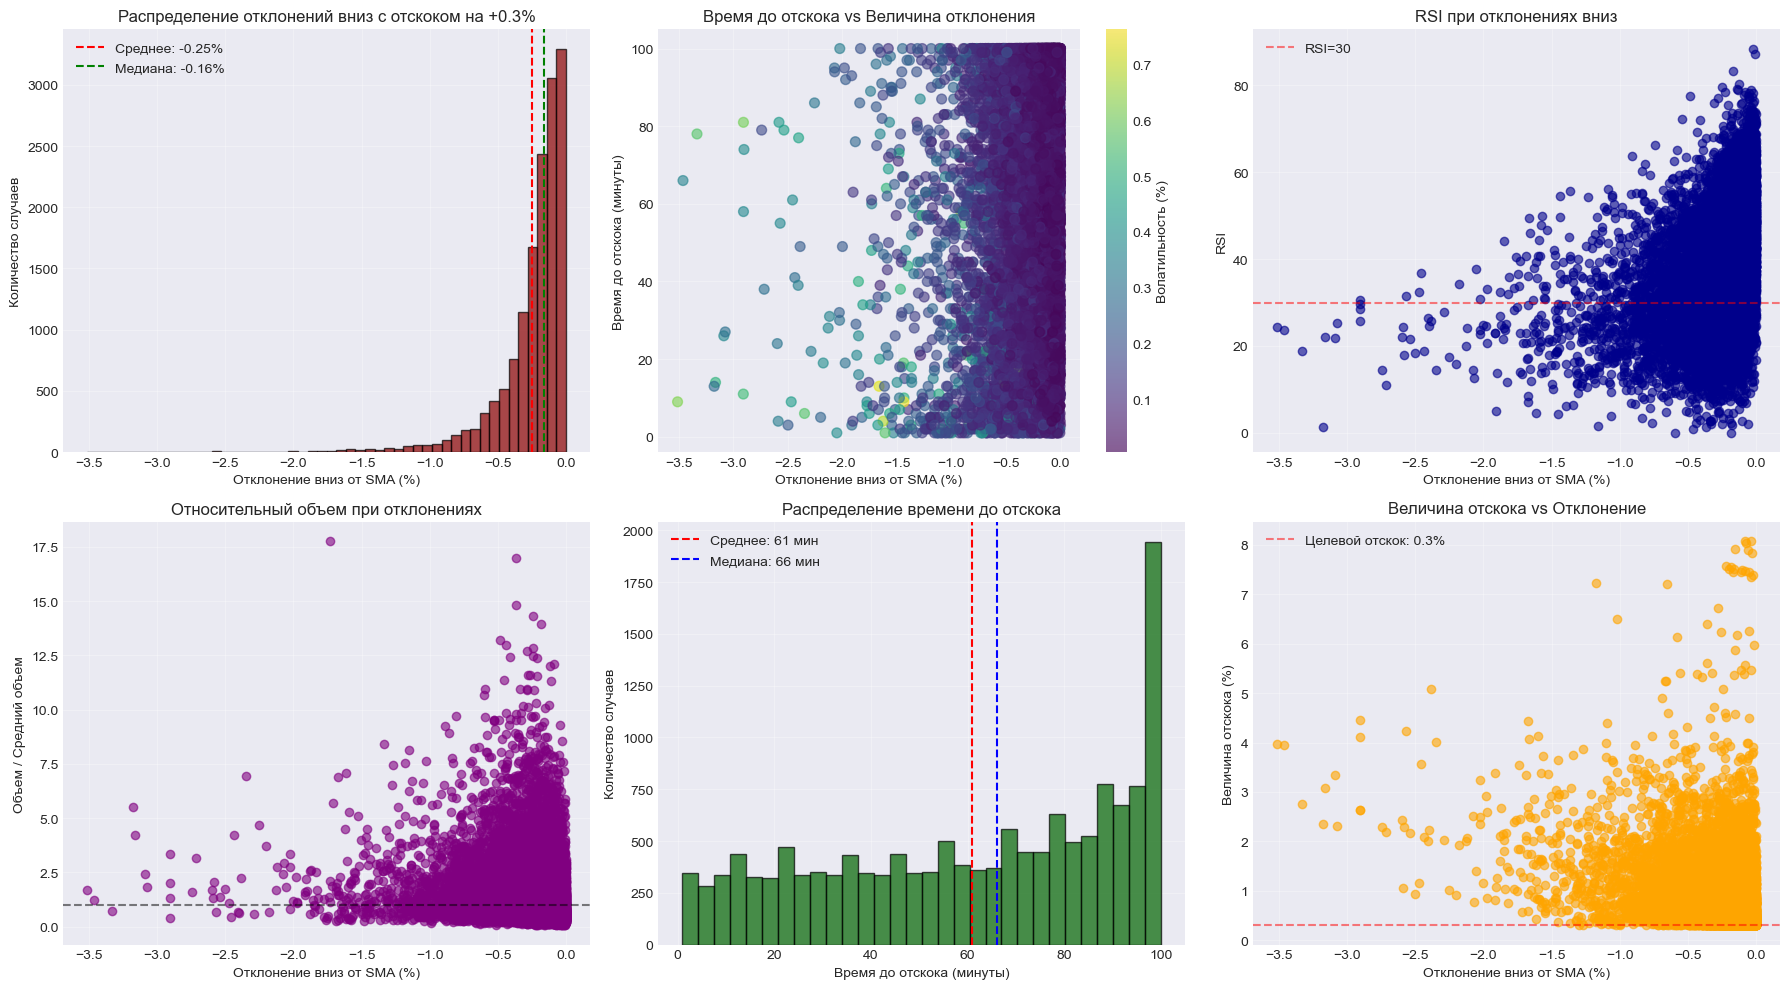



Статистика по группам отклонений:
                time_to_bounce                   bounce_pct            \
                          mean median        std       mean       min   
deviation_group                                                         
< -2%                43.289474   35.0  31.141272   2.527557  0.782544   
-2% to -1.5%         47.412500   46.5  33.973070   1.822678  0.436676   
-1.5% to -1%         43.362550   43.0  32.757778   1.469144  0.310192   
-1% to -0.5%         52.501475   54.0  32.480082   1.143646  0.300390   
> -0.5%              62.144303   68.0  29.830141   0.765980  0.300000   

                                 rsi volatility deviation_pct  
                      max       mean       mean         count  
deviation_group                                                
< -2%            5.075141  23.015896   0.356837            38  
-2% to -1.5%     4.434231  26.582423   0.266636            80  
-1.5% to -1%     7.231620  27.140021   0.202382           2

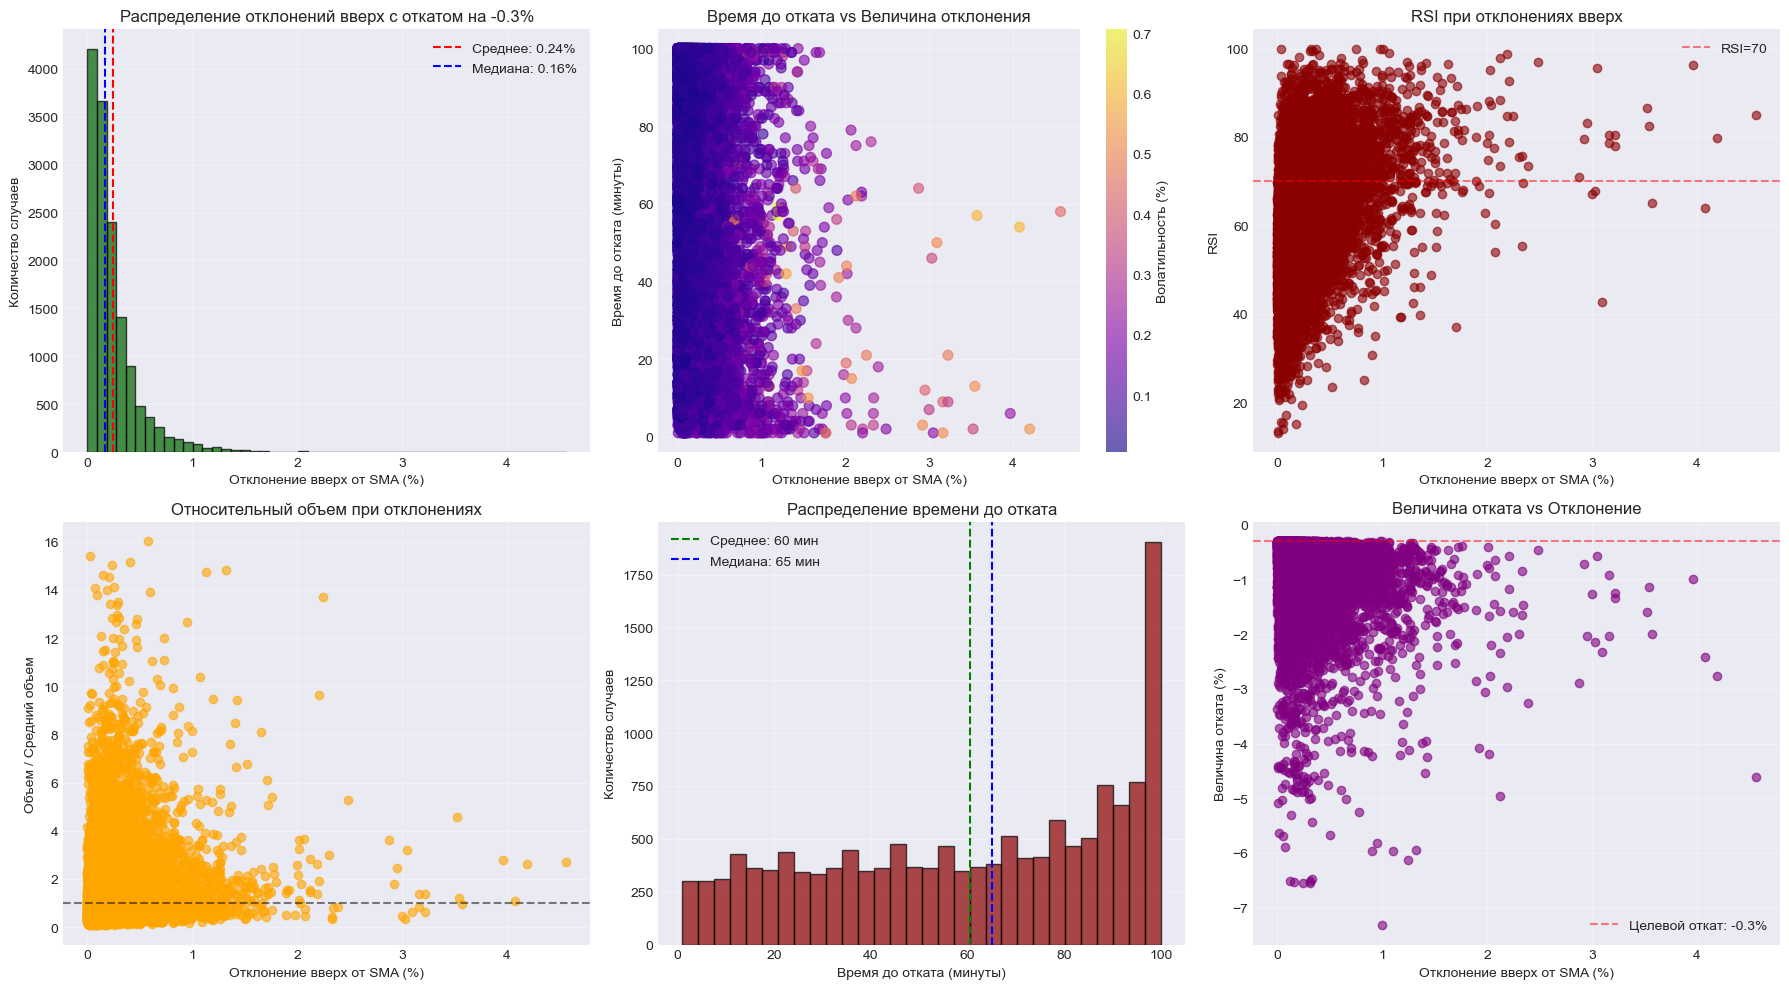



Статистика по группам отклонений:
                time_to_pullback                   pullback_pct            \
                            mean median        std         mean       min   
deviation_group                                                             
< 0.5%                 61.929956   67.0  29.879773    -0.762298 -6.556376   
0.5% to 1%             50.074879   47.0  31.558191    -1.052140 -5.968602   
1% to 1.5%             44.760956   42.0  33.319643    -1.293045 -7.323441   
1.5% to 2%             41.880000   45.5  29.219535    -1.422137 -4.074498   
> 2%                   27.452381   16.5  25.974849    -1.804028 -4.959457   

                                 rsi volatility deviation_pct  
                      max       mean       mean         count  
deviation_group                                                
< 0.5%          -0.300005  60.668270   0.061550         12849  
0.5% to 1%      -0.301292  70.746434   0.120146          1242  
1% to 1.5%      -0.302742  

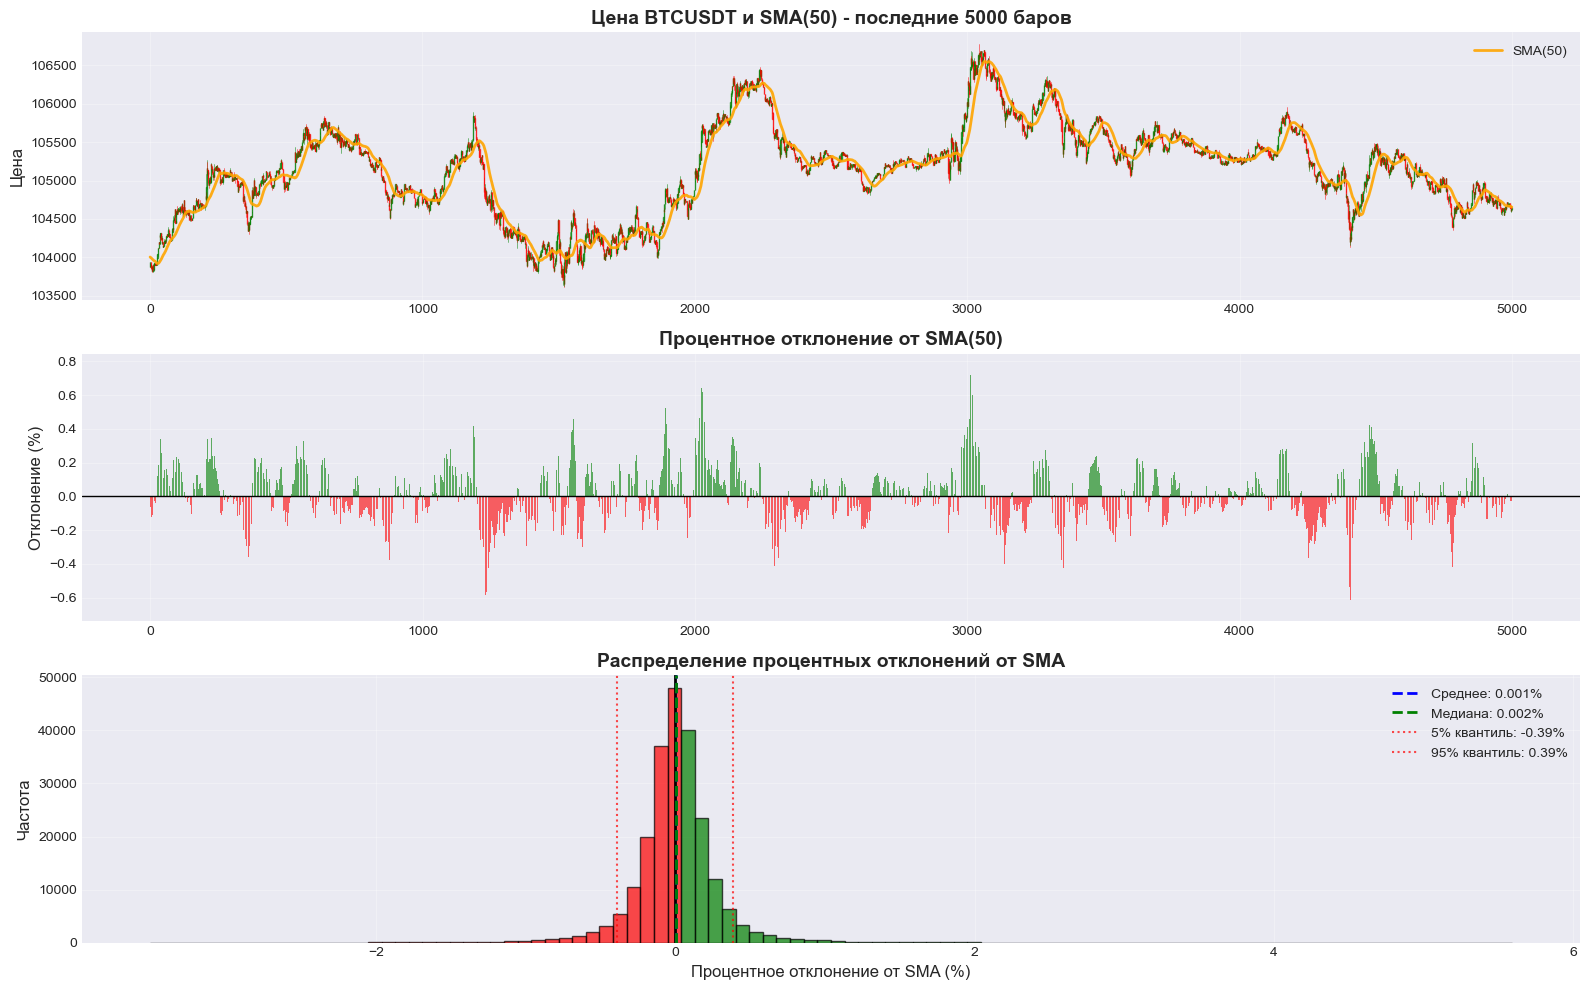


Детальная статистика отклонений:
Количество наблюдений: 222971
Среднее отклонение: 0.0014%
Стандартное отклонение: 0.2824%
Асимметрия (skewness): 0.1558
Эксцесс (kurtosis): 17.1703
Минимальное отклонение: -3.5103%
Максимальное отклонение: 5.5900%

Время нахождения выше SMA: 50.56%
Время нахождения ниже SMA: 49.44%

Тесты на нормальность распределения:
Jarque-Bera test: статистика = 2739762.0830, p-value = 0.000000
Shapiro-Wilk test: статистика = 0.8925, p-value = 0.000000
Распределение отклонений статистически отличается от нормального (есть 'толстые хвосты')


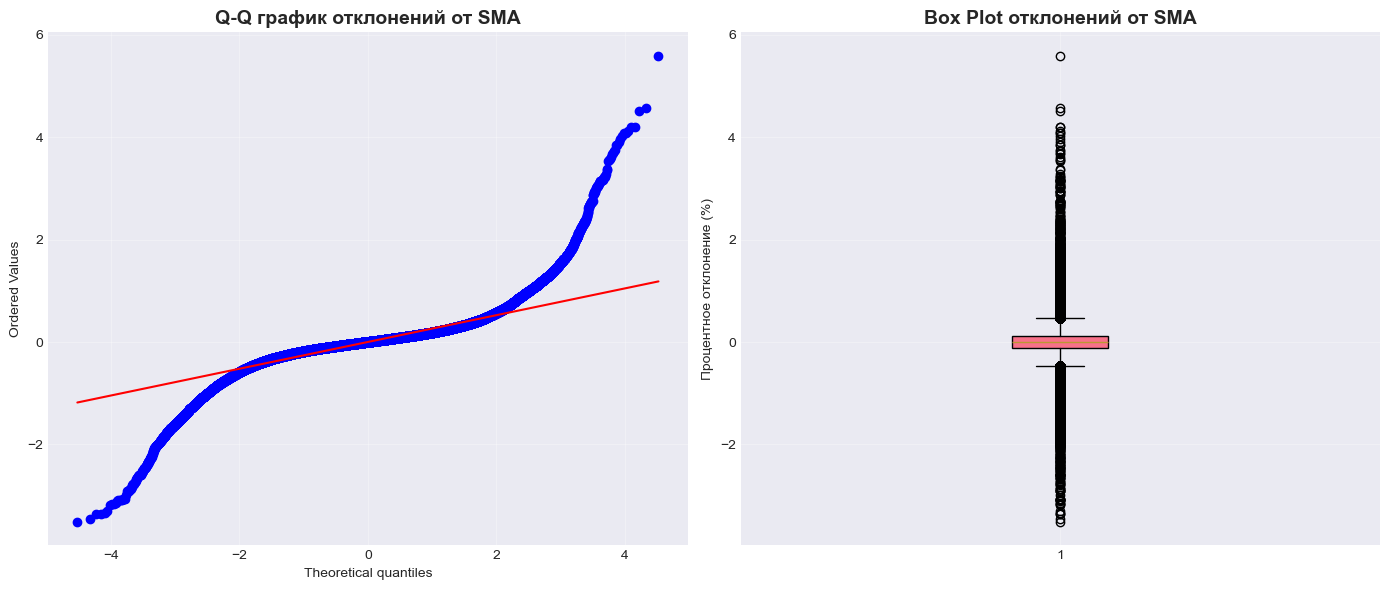


2. ИССЛЕДОВАНИЕ ВРЕМЕНИ ВОЗВРАТА К SMA ПОСЛЕ ЗНАЧИТЕЛЬНЫХ ОТКЛОНЕНИЙ:
Обнаружено 1498 значительных отклонений (>0.42%) с последующим возвратом к SMA

Статистика времени возврата:
Среднее время возврата: 23.8 минут
Медианное время возврата: 20.0 минут
Стандартное отклонение: 17.9 минут
Минимальное время: 1.0 минут
Максимальное время: 164.0 минут

Отклонения вверх: 739 случаев
  Среднее время возврата: 24.0 минут
  Средняя волатильность: 0.112%

Отклонения вниз: 759 случаев
  Среднее время возврата: 23.6 минут
  Средняя волатильность: 0.115%


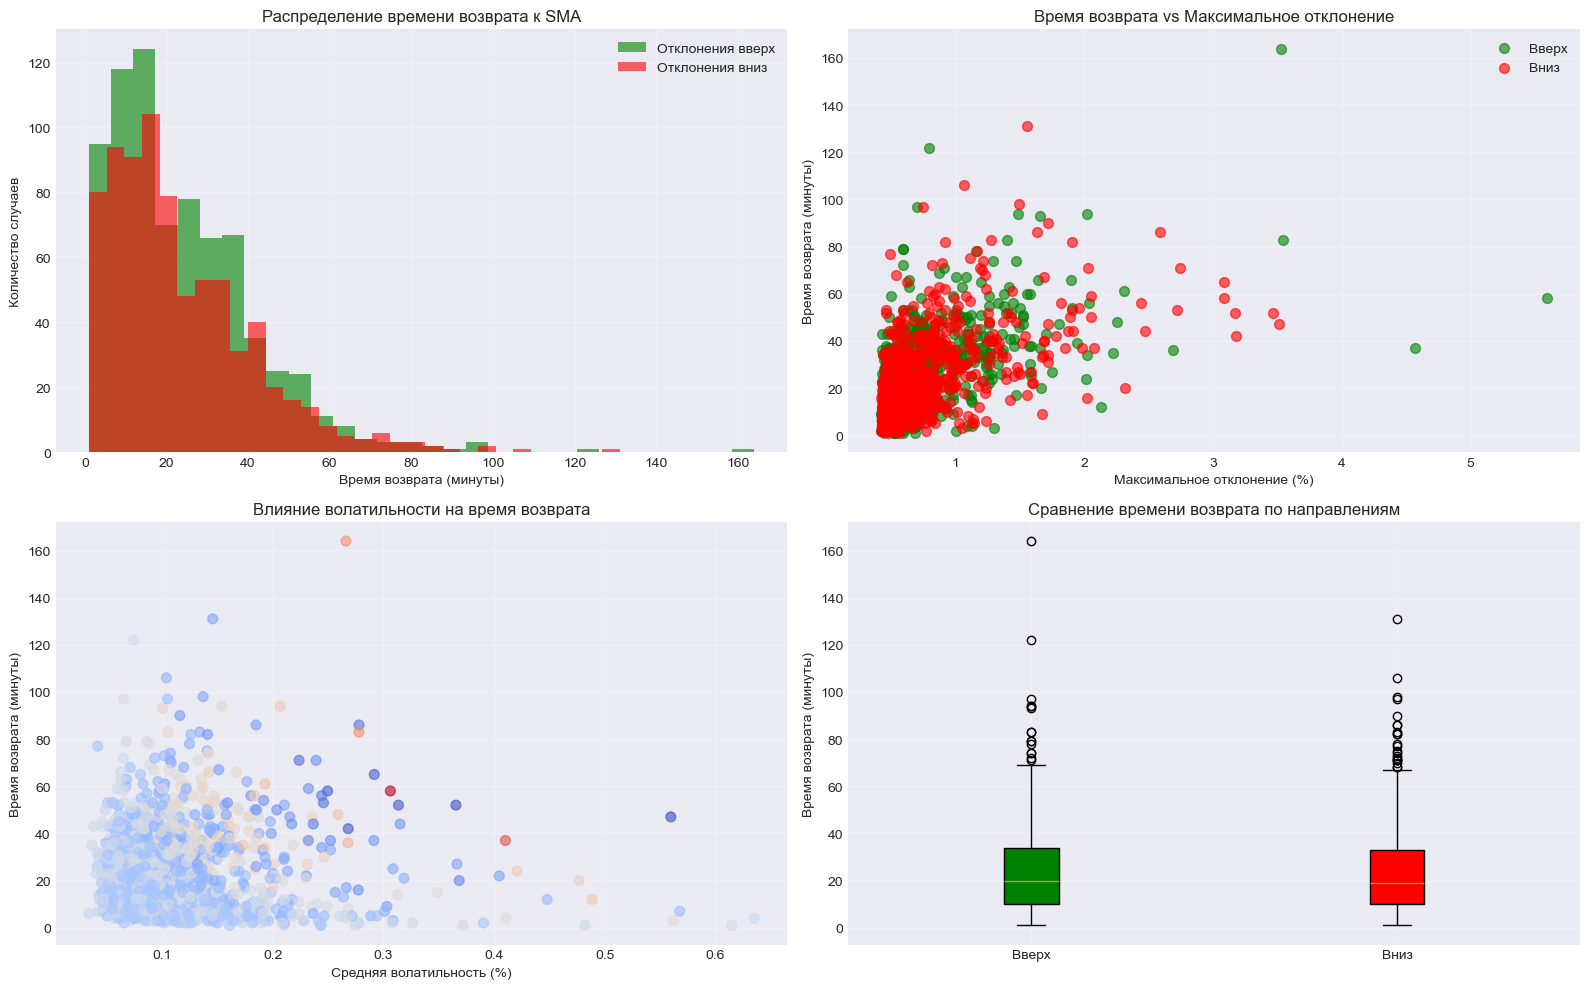


Анализ завершен. Все результаты сохранены и визуализированы.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pytz
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import mplfinance as mpf

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# НАСТРОЙКИ И ПАРАМЕТРЫ АНАЛИЗА
# ============================================================================

# Файл с данными
DATA_FILE = 'BTCUSDT_1m_01012025_05062025.csv'

# Параметры исследования
SYMBOL = 'BTCUSDT'        # Актив
SMA_PERIOD = 50           # Период SMA
TIMEFRAME = '1m'          # Таймфрейм
START_DATE = '2025-01-01' # Начальная дата
END_DATE = '2025-06-05'   # Конечная дата

# Параметры для анализа отскоков и откатов
BOUNCE_TARGET = 0.3         # Целевой процент отскока вверх после отклонения вниз (%)
PULLBACK_TARGET = -0.3      # Целевой процент отката вниз после отклонения вверх (%)

# Параметры для анализа времени возврата к SMA
SIGNIFICANT_DEVIATION_MULTIPLIER = 1.5  # Множитель стандартного отклонения для определения значительных отклонений

# Параметры для поиска отскоков/откатов
MAX_BARS_TO_TARGET = 100    # Максимальное количество баров для поиска цели

# ============================================================================

# Функция для рисования свечного графика
def plot_candlestick(df_plot, sma_period, title="", deviation_point=None, target_point=None, figsize=(14, 8)):
    """
    Рисует свечной график с SMA и отмеченными точками отклонения/отскока
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [3, 1]})
    
    # Подготовка данных для свечного графика
    for idx, row in df_plot.iterrows():
        if isinstance(idx, pd.Timestamp):
            # Если индекс - это Timestamp, используем порядковый номер
            x_pos = df_plot.index.get_loc(idx)
        else:
            x_pos = idx
            
        color = 'green' if row['close'] >= row['open'] else 'red'
        ax1.plot([x_pos, x_pos], [row['low'], row['high']], color=color, linewidth=0.5)
        body_height = abs(row['close'] - row['open'])
        body_bottom = min(row['close'], row['open'])
        ax1.add_patch(Rectangle((x_pos - 0.3, body_bottom), 0.6, body_height, 
                                facecolor=color, edgecolor=color, alpha=0.8))
    
    # SMA
    x_values = range(len(df_plot))
    ax1.plot(x_values, df_plot['sma'], label=f'SMA({sma_period})', 
             color='orange', linewidth=2, alpha=0.8)
    
    # Отметки точек отклонения и цели
    if deviation_point is not None:
        # Ищем индекс точки отклонения в данных
        if 'timestamp' in df_plot.columns:
            mask = df_plot['timestamp'] == deviation_point['time']
            if mask.any():
                x_dev = df_plot.index[mask][0]
                ax1.scatter(x_dev, deviation_point['price'], 
                           color='red', s=200, zorder=5, marker='v', 
                           label=f'Отклонение {deviation_point["pct"]:.2f}%')
                ax1.axvline(x=x_dev, color='red', linestyle='--', alpha=0.3)
    
    if target_point is not None:
        # Ищем индекс целевой точки в данных
        if 'timestamp' in df_plot.columns:
            mask = df_plot['timestamp'] == target_point['time']
            if mask.any():
                x_target = df_plot.index[mask][0]
                ax1.scatter(x_target, target_point['price'], 
                           color='green', s=200, zorder=5, marker='^', 
                           label=f'Цель {target_point["pct"]:.2f}%')
                ax1.axvline(x=x_target, color='green', linestyle='--', alpha=0.3)
    
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.set_ylabel('Цена', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # Устанавливаем метки оси X
    n_ticks = min(10, len(df_plot))
    tick_indices = np.linspace(0, len(df_plot)-1, n_ticks, dtype=int)
    ax1.set_xticks(tick_indices)
    
    # Получаем временные метки для отображения
    if 'timestamp' in df_plot.columns:
        tick_labels = [df_plot.iloc[i]['timestamp'].strftime('%m-%d %H:%M') for i in tick_indices]
    else:
        tick_labels = [str(i) for i in tick_indices]
    
    ax1.set_xticklabels(tick_labels, rotation=45)
    
    # График процентного отклонения
    ax2.bar(x_values, df_plot['pct_deviation'], 
            color=['green' if x > 0 else 'red' for x in df_plot['pct_deviation']], 
            alpha=0.6)
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.set_ylabel('Отклонение от SMA (%)', fontsize=12)
    ax2.set_xlabel('Время', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Устанавливаем метки оси X для нижнего графика
    ax2.set_xticks(tick_indices)
    ax2.set_xticklabels(tick_labels, rotation=45)
    
    plt.tight_layout()
    return fig

# Загрузка данных из CSV файла
print(f"Загрузка данных {SYMBOL} из файла {DATA_FILE}...")
df = pd.read_csv(DATA_FILE)

# Преобразование временной метки в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Преобразование типов данных
for col in ['open', 'high', 'low', 'close', 'volume']:
    df[col] = df[col].astype(float)

# Фильтрация данных по указанным датам
start_dt = pd.to_datetime(START_DATE)
end_dt = pd.to_datetime(END_DATE)
df = df[(df.index >= start_dt) & (df.index <= end_dt)]

print(f"Загружено {len(df)} строк данных после фильтрации по датам")
print(f"Период: с {df.index.min()} по {df.index.max()}")

# Расчет SMA
df['sma'] = df['close'].rolling(window=SMA_PERIOD).mean()

# Удаление первых N строк, где SMA не рассчитана (NaN)
df = df.dropna()

# Расчет отклонения от SMA
df['deviation'] = df['close'] - df['sma']
df['pct_deviation'] = (df['deviation'] / df['sma']) * 100  # в процентах

# Расчет абсолютного отклонения
df['abs_deviation'] = abs(df['deviation'])
df['abs_pct_deviation'] = abs(df['pct_deviation'])

# Расчет RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

df['rsi'] = calculate_rsi(df['close'], 14)

# Определяем "над" или "под" SMA
df['above_sma'] = df['close'] > df['sma']

# Добавляем временные характеристики
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

# Дополнительные технические индикаторы для более точного анализа
df['volatility'] = df['close'].pct_change().rolling(14).std() * 100
df['volume_sma'] = df['volume'].rolling(window=20).mean()
df['volume_ratio'] = df['volume'] / df['volume_sma']

# Информация о данных
print(f"\nДанные после обработки: {len(df)} строк")
print(f"Период анализа: с {df.index.min()} по {df.index.max()}")

# Базовая статистика
print("\nБазовая статистика по данным:")
summary = df[['close', 'sma', 'deviation', 'pct_deviation', 'abs_deviation', 'abs_pct_deviation', 'rsi', 'volatility']].describe()
print(summary)

# НАЧАЛО АНАЛИЗА

# ДЕТАЛЬНЫЙ АНАЛИЗ ОТКЛОНЕНИЙ
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ОТКЛОНЕНИЙ ОТ SMA")
print("="*80)

# Анализ распределения отклонений по квантилям
quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
deviation_quantiles = df['pct_deviation'].quantile(quantiles)

print("\nКвантили процентных отклонений от SMA:")
for q, val in zip(quantiles, deviation_quantiles):
    print(f"{q*100:5.0f}% квантиль: {val:7.3f}%")

# Анализ экстремальных отклонений
extreme_up = df[df['pct_deviation'] > deviation_quantiles[0.95]]
extreme_down = df[df['pct_deviation'] < deviation_quantiles[0.05]]

print(f"\nЭкстремальные отклонения вверх (top 5%): {len(extreme_up)} случаев")
print(f"Экстремальные отклонения вниз (bottom 5%): {len(extreme_down)} случаев")

# НОВЫЙ АНАЛИЗ 1: Минимально-максимальное отклонение вниз от SMA с последующим отскоком
print(f"\n{'='*80}")
print(f"АНАЛИЗ ОТСКОКОВ НА +{BOUNCE_TARGET}% ПОСЛЕ ОТКЛОНЕНИЙ ВНИЗ ОТ SMA")
print(f"{'='*80}")

# Улучшенная функция для поиска отскоков после отклонений вниз
def find_bounces_after_down_deviations_advanced(df, target_bounce_pct, max_bars=MAX_BARS_TO_TARGET):
    bounces = []
    
    # Ищем все локальные минимумы (потенциальные точки отклонения)
    df['local_min'] = (df['low'] < df['low'].shift(1)) & (df['low'] < df['low'].shift(-1))
    
    for i in range(len(df) - max_bars):
        if df['pct_deviation'].iloc[i] < 0 and df['local_min'].iloc[i]:
            current_deviation = df['pct_deviation'].iloc[i]
            current_price = df['low'].iloc[i]  # Используем low для более точного анализа
            current_time = df.index[i]
            
            # Ищем максимальную цену в следующих барах
            future_data = df.iloc[i+1:i+max_bars+1]
            if len(future_data) > 0:
                max_future_price = future_data['high'].max()  # Используем high
                max_bounce_pct = ((max_future_price - current_price) / current_price) * 100
                
                # Если достигнут целевой отскок
                if max_bounce_pct >= target_bounce_pct:
                    max_price_idx = future_data['high'].idxmax()
                    time_to_bounce = (max_price_idx - current_time).total_seconds() / 60
                    
                    # Дополнительные метрики
                    volatility_at_deviation = df.loc[current_time, 'volatility']
                    volume_ratio_at_deviation = df.loc[current_time, 'volume_ratio']
                    rsi_at_deviation = df.loc[current_time, 'rsi']
                    
                    bounces.append({
                        'deviation_time': current_time,
                        'deviation_pct': current_deviation,
                        'deviation_price': current_price,
                        'bounce_time': max_price_idx,
                        'bounce_price': max_future_price,
                        'bounce_pct': max_bounce_pct,
                        'time_to_bounce': time_to_bounce,
                        'volatility': volatility_at_deviation,
                        'volume_ratio': volume_ratio_at_deviation,
                        'rsi': rsi_at_deviation,
                        'bars_to_bounce': len(df.loc[current_time:max_price_idx]) - 1
                    })
    
    return pd.DataFrame(bounces)

# Находим все отскоки
bounce_data = find_bounces_after_down_deviations_advanced(df, BOUNCE_TARGET)

if len(bounce_data) > 0:
    print(f"Найдено {len(bounce_data)} случаев отскока на +{BOUNCE_TARGET}% или более после отклонения вниз")
    
    # Детальная статистика по отклонениям
    print(f"\nСтатистика отклонений вниз, после которых был отскок на +{BOUNCE_TARGET}%:")
    print(f"Минимальное отклонение: {bounce_data['deviation_pct'].max():.3f}% (ближе к SMA)")
    print(f"Максимальное отклонение: {bounce_data['deviation_pct'].min():.3f}% (дальше от SMA)")
    print(f"Среднее отклонение: {bounce_data['deviation_pct'].mean():.3f}%")
    print(f"Медианное отклонение: {bounce_data['deviation_pct'].median():.3f}%")
    print(f"Стандартное отклонение: {bounce_data['deviation_pct'].std():.3f}%")
    
    print(f"\nВремя до отскока:")
    print(f"Среднее: {bounce_data['time_to_bounce'].mean():.1f} минут")
    print(f"Медиана: {bounce_data['time_to_bounce'].median():.1f} минут")
    print(f"Минимум: {bounce_data['time_to_bounce'].min():.1f} минут")
    print(f"Максимум: {bounce_data['time_to_bounce'].max():.1f} минут")
    
    # Анализ по условиям рынка
    print(f"\nСредние показатели при отклонениях:")
    print(f"RSI: {bounce_data['rsi'].mean():.1f}")
    print(f"Волатильность: {bounce_data['volatility'].mean():.3f}%")
    print(f"Объем/Средний объем: {bounce_data['volume_ratio'].mean():.2f}")
    
    # Дополнительная визуализация статистики
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # График 1: Гистограмма отклонений
    ax = axes[0, 0]
    ax.hist(bounce_data['deviation_pct'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
    ax.axvline(bounce_data['deviation_pct'].mean(), color='red', linestyle='--', 
               label=f'Среднее: {bounce_data["deviation_pct"].mean():.2f}%')
    ax.axvline(bounce_data['deviation_pct'].median(), color='green', linestyle='--', 
               label=f'Медиана: {bounce_data["deviation_pct"].median():.2f}%')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Количество случаев')
    ax.set_title(f'Распределение отклонений вниз с отскоком на +{BOUNCE_TARGET}%')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость времени до отскока от величины отклонения
    ax = axes[0, 1]
    scatter = ax.scatter(bounce_data['deviation_pct'], bounce_data['time_to_bounce'], 
                        c=bounce_data['volatility'], cmap='viridis', alpha=0.6, s=50)
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Время до отскока (минуты)')
    ax.set_title('Время до отскока vs Величина отклонения')
    plt.colorbar(scatter, ax=ax, label='Волатильность (%)')
    ax.grid(True, alpha=0.3)
    
    # График 3: RSI при отклонениях
    ax = axes[0, 2]
    ax.scatter(bounce_data['deviation_pct'], bounce_data['rsi'], alpha=0.6, color='darkblue')
    ax.axhline(y=30, color='red', linestyle='--', alpha=0.5, label='RSI=30')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('RSI')
    ax.set_title('RSI при отклонениях вниз')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 4: Объем при отклонениях
    ax = axes[1, 0]
    ax.scatter(bounce_data['deviation_pct'], bounce_data['volume_ratio'], alpha=0.6, color='purple')
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Объем / Средний объем')
    ax.set_title('Относительный объем при отклонениях')
    ax.grid(True, alpha=0.3)
    
    # График 5: Распределение времени до отскока
    ax = axes[1, 1]
    ax.hist(bounce_data['time_to_bounce'], bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
    ax.axvline(bounce_data['time_to_bounce'].mean(), color='red', linestyle='--', 
               label=f'Среднее: {bounce_data["time_to_bounce"].mean():.0f} мин')
    ax.axvline(bounce_data['time_to_bounce'].median(), color='blue', linestyle='--', 
               label=f'Медиана: {bounce_data["time_to_bounce"].median():.0f} мин')
    ax.set_xlabel('Время до отскока (минуты)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение времени до отскока')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 6: Величина отскока vs отклонение
    ax = axes[1, 2]
    ax.scatter(bounce_data['deviation_pct'], bounce_data['bounce_pct'], alpha=0.6, color='orange')
    ax.axhline(y=BOUNCE_TARGET, color='red', linestyle='--', alpha=0.5, label=f'Целевой отскок: {BOUNCE_TARGET}%')
    ax.set_xlabel('Отклонение вниз от SMA (%)')
    ax.set_ylabel('Величина отскока (%)')
    ax.set_title('Величина отскока vs Отклонение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ по группам отклонений
    bounce_data['deviation_group'] = pd.cut(bounce_data['deviation_pct'], 
                                           bins=[-np.inf, -2, -1.5, -1, -0.5, 0],
                                           labels=['< -2%', '-2% to -1.5%', '-1.5% to -1%', '-1% to -0.5%', '> -0.5%'])
    
    group_stats = bounce_data.groupby('deviation_group').agg({
        'time_to_bounce': ['mean', 'median', 'std'],
        'bounce_pct': ['mean', 'min', 'max'],
        'rsi': 'mean',
        'volatility': 'mean',
        'deviation_pct': 'count'
    })
    
    print("\n\nСтатистика по группам отклонений:")
    print(group_stats)
    
else:
    print(f"Не найдено случаев отскока на +{BOUNCE_TARGET}% после отклонения вниз")

# НОВЫЙ АНАЛИЗ 2: Минимально-максимальное отклонение вверх от SMA с последующим откатом
print(f"\n{'='*80}")
print(f"АНАЛИЗ ОТКАТОВ НА {PULLBACK_TARGET}% ПОСЛЕ ОТКЛОНЕНИЙ ВВЕРХ ОТ SMA")
print(f"{'='*80}")

# Улучшенная функция для поиска откатов после отклонений вверх
def find_pullbacks_after_up_deviations_advanced(df, target_pullback_pct, max_bars=MAX_BARS_TO_TARGET):
    pullbacks = []
    
    # Ищем все локальные максимумы (потенциальные точки отклонения)
    df['local_max'] = (df['high'] > df['high'].shift(1)) & (df['high'] > df['high'].shift(-1))
    
    for i in range(len(df) - max_bars):
        if df['pct_deviation'].iloc[i] > 0 and df['local_max'].iloc[i]:
            current_deviation = df['pct_deviation'].iloc[i]
            current_price = df['high'].iloc[i]  # Используем high для более точного анализа
            current_time = df.index[i]
            
            # Ищем минимальную цену в следующих барах
            future_data = df.iloc[i+1:i+max_bars+1]
            if len(future_data) > 0:
                min_future_price = future_data['low'].min()  # Используем low
                max_pullback_pct = ((min_future_price - current_price) / current_price) * 100
                
                # Если достигнут целевой откат
                if max_pullback_pct <= target_pullback_pct:
                    min_price_idx = future_data['low'].idxmin()
                    time_to_pullback = (min_price_idx - current_time).total_seconds() / 60
                    
                    # Дополнительные метрики
                    volatility_at_deviation = df.loc[current_time, 'volatility']
                    volume_ratio_at_deviation = df.loc[current_time, 'volume_ratio']
                    rsi_at_deviation = df.loc[current_time, 'rsi']
                    
                    pullbacks.append({
                        'deviation_time': current_time,
                        'deviation_pct': current_deviation,
                        'deviation_price': current_price,
                        'pullback_time': min_price_idx,
                        'pullback_price': min_future_price,
                        'pullback_pct': max_pullback_pct,
                        'time_to_pullback': time_to_pullback,
                        'volatility': volatility_at_deviation,
                        'volume_ratio': volume_ratio_at_deviation,
                        'rsi': rsi_at_deviation,
                        'bars_to_pullback': len(df.loc[current_time:min_price_idx]) - 1
                    })
    
    return pd.DataFrame(pullbacks)

# Находим все откаты
pullback_data = find_pullbacks_after_up_deviations_advanced(df, PULLBACK_TARGET)

if len(pullback_data) > 0:
    print(f"Найдено {len(pullback_data)} случаев отката на {PULLBACK_TARGET}% или более после отклонения вверх")
    
    # Детальная статистика по отклонениям
    print(f"\nСтатистика отклонений вверх, после которых был откат на {PULLBACK_TARGET}%:")
    print(f"Минимальное отклонение: {pullback_data['deviation_pct'].min():.3f}% (ближе к SMA)")
    print(f"Максимальное отклонение: {pullback_data['deviation_pct'].max():.3f}% (дальше от SMA)")
    print(f"Среднее отклонение: {pullback_data['deviation_pct'].mean():.3f}%")
    print(f"Медианное отклонение: {pullback_data['deviation_pct'].median():.3f}%")
    print(f"Стандартное отклонение: {pullback_data['deviation_pct'].std():.3f}%")
    
    print(f"\nВремя до отката:")
    print(f"Среднее: {pullback_data['time_to_pullback'].mean():.1f} минут")
    print(f"Медиана: {pullback_data['time_to_pullback'].median():.1f} минут")
    print(f"Минимум: {pullback_data['time_to_pullback'].min():.1f} минут")
    print(f"Максимум: {pullback_data['time_to_pullback'].max():.1f} минут")
    
    # Анализ по условиям рынка
    print(f"\nСредние показатели при отклонениях:")
    print(f"RSI: {pullback_data['rsi'].mean():.1f}")
    print(f"Волатильность: {pullback_data['volatility'].mean():.3f}%")
    print(f"Объем/Средний объем: {pullback_data['volume_ratio'].mean():.2f}")
    
    # Дополнительная визуализация статистики для откатов
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # График 1: Гистограмма отклонений
    ax = axes[0, 0]
    ax.hist(pullback_data['deviation_pct'], bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
    ax.axvline(pullback_data['deviation_pct'].mean(), color='red', linestyle='--', 
               label=f'Среднее: {pullback_data["deviation_pct"].mean():.2f}%')
    ax.axvline(pullback_data['deviation_pct'].median(), color='blue', linestyle='--', 
               label=f'Медиана: {pullback_data["deviation_pct"].median():.2f}%')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Количество случаев')
    ax.set_title(f'Распределение отклонений вверх с откатом на {PULLBACK_TARGET}%')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость времени до отката от величины отклонения
    ax = axes[0, 1]
    scatter = ax.scatter(pullback_data['deviation_pct'], pullback_data['time_to_pullback'], 
                        c=pullback_data['volatility'], cmap='plasma', alpha=0.6, s=50)
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Время до отката (минуты)')
    ax.set_title('Время до отката vs Величина отклонения')
    plt.colorbar(scatter, ax=ax, label='Волатильность (%)')
    ax.grid(True, alpha=0.3)
    
    # График 3: RSI при отклонениях
    ax = axes[0, 2]
    ax.scatter(pullback_data['deviation_pct'], pullback_data['rsi'], alpha=0.6, color='darkred')
    ax.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='RSI=70')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('RSI')
    ax.set_title('RSI при отклонениях вверх')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 4: Объем при отклонениях
    ax = axes[1, 0]
    ax.scatter(pullback_data['deviation_pct'], pullback_data['volume_ratio'], alpha=0.6, color='orange')
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Объем / Средний объем')
    ax.set_title('Относительный объем при отклонениях')
    ax.grid(True, alpha=0.3)
    
    # График 5: Распределение времени до отката
    ax = axes[1, 1]
    ax.hist(pullback_data['time_to_pullback'], bins=30, edgecolor='black', alpha=0.7, color='darkred')
    ax.axvline(pullback_data['time_to_pullback'].mean(), color='green', linestyle='--', 
               label=f'Среднее: {pullback_data["time_to_pullback"].mean():.0f} мин')
    ax.axvline(pullback_data['time_to_pullback'].median(), color='blue', linestyle='--', 
               label=f'Медиана: {pullback_data["time_to_pullback"].median():.0f} мин')
    ax.set_xlabel('Время до отката (минуты)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение времени до отката')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 6: Величина отката vs отклонение
    ax = axes[1, 2]
    ax.scatter(pullback_data['deviation_pct'], pullback_data['pullback_pct'], alpha=0.6, color='purple')
    ax.axhline(y=PULLBACK_TARGET, color='red', linestyle='--', alpha=0.5, label=f'Целевой откат: {PULLBACK_TARGET}%')
    ax.set_xlabel('Отклонение вверх от SMA (%)')
    ax.set_ylabel('Величина отката (%)')
    ax.set_title('Величина отката vs Отклонение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ по группам отклонений
    pullback_data['deviation_group'] = pd.cut(pullback_data['deviation_pct'], 
                                             bins=[0, 0.5, 1, 1.5, 2, np.inf],
                                             labels=['< 0.5%', '0.5% to 1%', '1% to 1.5%', '1.5% to 2%', '> 2%'])
    
    group_stats = pullback_data.groupby('deviation_group').agg({
        'time_to_pullback': ['mean', 'median', 'std'],
        'pullback_pct': ['mean', 'min', 'max'],
        'rsi': 'mean',
        'volatility': 'mean',
        'deviation_pct': 'count'
    })
    
    print("\n\nСтатистика по группам отклонений:")
    print(group_stats)
    
else:
    print(f"Не найдено случаев отката на {PULLBACK_TARGET}% после отклонения вверх")

print("\n" + "="*80)

# 1. Общий анализ частоты и амплитуды отклонений цены от SMA
print("\n1. ОБЩИЙ АНАЛИЗ ЧАСТОТЫ И АМПЛИТУДЫ ОТКЛОНЕНИЙ:")

# Создаем фигуру для общего обзора
fig = plt.figure(figsize=(16, 10))

# График 1: Свечной график с SMA (уменьшенная выборка для наглядности)
ax1 = plt.subplot(3, 1, 1)
sample_df = df.iloc[-5000:]  # Последние 5000 баров для наглядности

# Рисуем свечи
for idx, (timestamp, row) in enumerate(sample_df.iterrows()):
    color = 'green' if row['close'] >= row['open'] else 'red'
    ax1.plot([idx, idx], [row['low'], row['high']], color=color, linewidth=0.5, alpha=0.7)
    body_height = abs(row['close'] - row['open'])
    body_bottom = min(row['close'], row['open'])
    ax1.add_patch(Rectangle((idx - 0.3, body_bottom), 0.6, body_height, 
                            facecolor=color, edgecolor=color, alpha=0.7))

ax1.plot(range(len(sample_df)), sample_df['sma'], label=f'SMA({SMA_PERIOD})', 
         color='orange', linewidth=2, alpha=0.9)
ax1.set_title(f'Цена {SYMBOL} и SMA({SMA_PERIOD}) - последние 5000 баров', fontsize=14, fontweight='bold')
ax1.set_ylabel('Цена', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Процентное отклонение от SMA
ax2 = plt.subplot(3, 1, 2)
colors = ['green' if x > 0 else 'red' for x in sample_df['pct_deviation']]
ax2.bar(range(len(sample_df)), sample_df['pct_deviation'], color=colors, alpha=0.6)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title(f'Процентное отклонение от SMA({SMA_PERIOD})', fontsize=14, fontweight='bold')
ax2.set_ylabel('Отклонение (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

# График 3: Гистограмма отклонений с детальной статистикой
ax3 = plt.subplot(3, 1, 3)
n, bins, patches = ax3.hist(df['pct_deviation'], bins=100, edgecolor='black', alpha=0.7)

# Раскрашиваем бары гистограммы
for i, patch in enumerate(patches):
    if bins[i] < 0:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('green')

ax3.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax3.axvline(x=df['pct_deviation'].mean(), color='blue', linestyle='--', 
           label=f'Среднее: {df["pct_deviation"].mean():.3f}%', linewidth=2)
ax3.axvline(x=df['pct_deviation'].median(), color='green', linestyle='--', 
           label=f'Медиана: {df["pct_deviation"].median():.3f}%', linewidth=2)

# Добавляем квантили
for q in [0.05, 0.95]:
    val = df['pct_deviation'].quantile(q)
    ax3.axvline(x=val, color='red', linestyle=':', alpha=0.7, 
               label=f'{q*100:.0f}% квантиль: {val:.2f}%')

ax3.set_xlabel('Процентное отклонение от SMA (%)', fontsize=12)
ax3.set_ylabel('Частота', fontsize=12)
ax3.set_title('Распределение процентных отклонений от SMA', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Детальная статистика отклонений
print("\nДетальная статистика отклонений:")
print(f"Количество наблюдений: {len(df)}")
print(f"Среднее отклонение: {df['pct_deviation'].mean():.4f}%")
print(f"Стандартное отклонение: {df['pct_deviation'].std():.4f}%")
print(f"Асимметрия (skewness): {df['pct_deviation'].skew():.4f}")
print(f"Эксцесс (kurtosis): {df['pct_deviation'].kurtosis():.4f}")
print(f"Минимальное отклонение: {df['pct_deviation'].min():.4f}%")
print(f"Максимальное отклонение: {df['pct_deviation'].max():.4f}%")

# Анализ времени нахождения выше/ниже SMA
above_sma_pct = (df['above_sma'].sum() / len(df)) * 100
print(f"\nВремя нахождения выше SMA: {above_sma_pct:.2f}%")
print(f"Время нахождения ниже SMA: {100 - above_sma_pct:.2f}%")

# Проверка на нормальность распределения с дополнительными тестами
from scipy.stats import jarque_bera, shapiro

jb_stat, jb_pvalue = jarque_bera(df['pct_deviation'])
shapiro_stat, shapiro_pvalue = shapiro(df['pct_deviation'].sample(5000))  # Shapiro работает с ограниченной выборкой

print(f"\nТесты на нормальность распределения:")
print(f"Jarque-Bera test: статистика = {jb_stat:.4f}, p-value = {jb_pvalue:.6f}")
print(f"Shapiro-Wilk test: статистика = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.6f}")

if jb_pvalue < 0.05 and shapiro_pvalue < 0.05:
    print("Распределение отклонений статистически отличается от нормального (есть 'толстые хвосты')")
else:
    print("Распределение отклонений близко к нормальному")

# Q-Q график для визуальной проверки нормальности
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q plot
stats.probplot(df['pct_deviation'], dist="norm", plot=ax1)
ax1.set_title('Q-Q график отклонений от SMA', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Box plot для выявления выбросов
ax2.boxplot([df['pct_deviation']], vert=True, patch_artist=True)
ax2.set_ylabel('Процентное отклонение (%)')
ax2.set_title('Box Plot отклонений от SMA', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Исследование времени возврата цены к SMA после значительных отклонений
print("\n2. ИССЛЕДОВАНИЕ ВРЕМЕНИ ВОЗВРАТА К SMA ПОСЛЕ ЗНАЧИТЕЛЬНЫХ ОТКЛОНЕНИЙ:")

# Определение значительных отклонений (более 1.5 стандартных отклонений)
std_dev = df['pct_deviation'].std()
significant_deviation_threshold = SIGNIFICANT_DEVIATION_MULTIPLIER * std_dev

# Определение пересечения SMA
df['crossed_sma'] = ((df['close'].shift(1) < df['sma'].shift(1)) & 
                     (df['close'] > df['sma'])) | ((df['close'].shift(1) > df['sma'].shift(1)) & 
                     (df['close'] < df['sma']))

# Улучшенная функция для расчета времени возврата к SMA
def calculate_return_time_advanced(dataframe, threshold):
    returns = []
    
    in_deviation = False
    deviation_start = None
    deviation_magnitude = None
    direction = None
    max_deviation = None
    
    for i in range(1, len(dataframe)):
        current_deviation = dataframe['pct_deviation'].iloc[i]
        
        # Начало значительного отклонения
        if abs(current_deviation) > threshold and not in_deviation:
            in_deviation = True
            deviation_start = dataframe.index[i]
            deviation_magnitude = current_deviation
            direction = "up" if current_deviation > 0 else "down"
            max_deviation = abs(current_deviation)
        
        # Обновляем максимальное отклонение
        elif in_deviation:
            max_deviation = max(max_deviation, abs(current_deviation))
            
            # Проверяем возврат к SMA
            if dataframe['crossed_sma'].iloc[i] or abs(current_deviation) < threshold * 0.3:
                time_to_return = (dataframe.index[i] - deviation_start).total_seconds() / 60
                
                # Дополнительные метрики
                avg_volatility = dataframe.loc[deviation_start:dataframe.index[i], 'volatility'].mean()
                avg_volume_ratio = dataframe.loc[deviation_start:dataframe.index[i], 'volume_ratio'].mean()
                
                returns.append({
                    'start_time': deviation_start,
                    'end_time': dataframe.index[i],
                    'return_time_minutes': time_to_return,
                    'initial_deviation': deviation_magnitude,
                    'max_deviation': max_deviation if direction == "up" else -max_deviation,
                    'direction': direction,
                    'avg_volatility': avg_volatility,
                    'avg_volume_ratio': avg_volume_ratio,
                    'bars_count': i - dataframe.index.get_loc(deviation_start)
                })
                
                in_deviation = False
                max_deviation = None
    
    return pd.DataFrame(returns)

return_data = calculate_return_time_advanced(df, significant_deviation_threshold)

if len(return_data) > 0:
    print(f"Обнаружено {len(return_data)} значительных отклонений (>{significant_deviation_threshold:.2f}%) с последующим возвратом к SMA")
    
    # Детальная статистика
    print("\nСтатистика времени возврата:")
    print(f"Среднее время возврата: {return_data['return_time_minutes'].mean():.1f} минут")
    print(f"Медианное время возврата: {return_data['return_time_minutes'].median():.1f} минут")
    print(f"Стандартное отклонение: {return_data['return_time_minutes'].std():.1f} минут")
    print(f"Минимальное время: {return_data['return_time_minutes'].min():.1f} минут")
    print(f"Максимальное время: {return_data['return_time_minutes'].max():.1f} минут")
    
    # Сравнение для разных направлений
    up_returns = return_data[return_data['direction'] == 'up']
    down_returns = return_data[return_data['direction'] == 'down']
    
    print(f"\nОтклонения вверх: {len(up_returns)} случаев")
    if len(up_returns) > 0:
        print(f"  Среднее время возврата: {up_returns['return_time_minutes'].mean():.1f} минут")
        print(f"  Средняя волатильность: {up_returns['avg_volatility'].mean():.3f}%")
    
    print(f"\nОтклонения вниз: {len(down_returns)} случаев")
    if len(down_returns) > 0:
        print(f"  Среднее время возврата: {down_returns['return_time_minutes'].mean():.1f} минут")
        print(f"  Средняя волатильность: {down_returns['avg_volatility'].mean():.3f}%")
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # График 1: Распределение времени возврата
    ax = axes[0, 0]
    ax.hist(up_returns['return_time_minutes'], bins=30, alpha=0.6, label='Отклонения вверх', color='green')
    ax.hist(down_returns['return_time_minutes'], bins=30, alpha=0.6, label='Отклонения вниз', color='red')
    ax.set_xlabel('Время возврата (минуты)')
    ax.set_ylabel('Количество случаев')
    ax.set_title('Распределение времени возврата к SMA')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Зависимость времени возврата от величины отклонения
    ax = axes[0, 1]
    scatter_up = ax.scatter(up_returns['max_deviation'], up_returns['return_time_minutes'], 
                           c='green', alpha=0.6, label='Вверх', s=50)
    scatter_down = ax.scatter(abs(down_returns['max_deviation']), down_returns['return_time_minutes'], 
                             c='red', alpha=0.6, label='Вниз', s=50)
    ax.set_xlabel('Максимальное отклонение (%)')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Время возврата vs Максимальное отклонение')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 3: Волатильность при возвратах
    ax = axes[1, 0]
    ax.scatter(return_data['avg_volatility'], return_data['return_time_minutes'], 
              c=return_data['max_deviation'], cmap='coolwarm', alpha=0.6, s=50)
    ax.set_xlabel('Средняя волатильность (%)')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Влияние волатильности на время возврата')
    ax.grid(True, alpha=0.3)
    
    # График 4: Box plot времени возврата по направлениям
    ax = axes[1, 1]
    data_to_plot = [up_returns['return_time_minutes'], down_returns['return_time_minutes']]
    bp = ax.boxplot(data_to_plot, labels=['Вверх', 'Вниз'], patch_artist=True)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    ax.set_ylabel('Время возврата (минуты)')
    ax.set_title('Сравнение времени возврата по направлениям')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nАнализ завершен. Все результаты сохранены и визуализированы.")

# Стратегия по SMA

### 1. Определение среднего значения
* Стратегия использует простую скользящую среднюю (SMA): SMA = (Цена₁ + Цена₂ + ... + Цена₅₀) / 50

### 2. Расчет отклонения от среднего
* Отклонение = (Текущая_цена - SMA) / SMA
* Пример: Если BTC стоит $45,000, а SMA = $50,000, то: Отклонение = (45,000 - 50,000) / 50,000 = -0.1 = -10%

### 3. Условие входа в позицию
* Покупаем, когда цена упала на 0.8% ниже SMA: Если Отклонение ≤ -0.008 (-0.8%), то размещаем ордера

### 4. Размещение ордеров
Стратегия размещает 3 лимитных ордера с разными объемами:
* Ордер 1: Цена = Текущая_цена × (1 - 0.008) = Цена × 0.992, объем = 20% от капитала
* Ордер 2: Цена = Ордер1_цена × (1 - 0.003) = Ордер1 × 0.997, объем = 30% от капитала
* Ордер 3: Цена = Ордер2_цена × (1 - 0.003) = Ордер2 × 0.997, объем = 50% от капитала

### 5. Условия выхода
Индивидуальные тейк-профиты (0.3%):
* TP_цена = Цена_входа × (1 + 0.003)
* Глобальный тейк-профит (0.2%):
* Глобальный_TP = Средняя_цена_входа × (1 + 0.002)

Стоп-лосс (-3%):
* SL_цена = Цена_первого_ордера × (1 - 0.03)
* Расчет прибыли

Прибыль:
* Прибыль = (Цена_выхода - Цена_входа) × Объем

Комиссия:
* Комиссия = (Цена_входа + Цена_выхода) × Объем × 0.0002

Чистая прибыль:
* Чистая_прибыль = Валовая_прибыль - Комиссия

Загрузка данных...
Загружено 217439 записей с 2025-01-01 00:01:00 по 2025-05-31 23:59:00
=== ТЕСТ СТАЦИОНАРНОСТИ (ADF) ===
ADF Statistic: -48.225209
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Результат: Ряд СТАЦИОНАРЕН (отвергаем нулевую гипотезу)

=== БЕКТЕСТИНГ С ОСНОВНЫМИ ПАРАМЕТРАМИ ===
SMA период: 50
Отклонение входа: -0.8%
Индивидуальный TP: 0.3%

=== МЕТРИКИ ПРОИЗВОДИТЕЛЬНОСТИ ОСНОВНЫЕ ПАРАМЕТРЫ ===
Общее количество сделок: 36
Прибыльные сделки: 36
Убыточные сделки: 0
Винрейт: 100.00%
Общая доходность: $878.77
Общая доходность: 8.79%
Profit Factor: inf
Максимальная просадка: 0.00%
Коэффициент Шарпа: 6.16

=== ОПТИМИЗАЦИЯ ПАРАМЕТРОВ ===
Тестирование комбинации 1/80: SMA=40, Entry=-0.6%, TP=0.2%
Тестирование комбинации 2/80: SMA=40, Entry=-0.6%, TP=0.3%
Тестирование комбинации 3/80: SMA=40, Entry=-0.6%, TP=0.4%
Тестирование комбинации 4/80: SMA=40, Entry=-0.6%, TP=0.4%
Тестирование комбинации 5/80: SMA=40, Entry=-0.7%, TP=0.2%
Тестирование комбинации 6

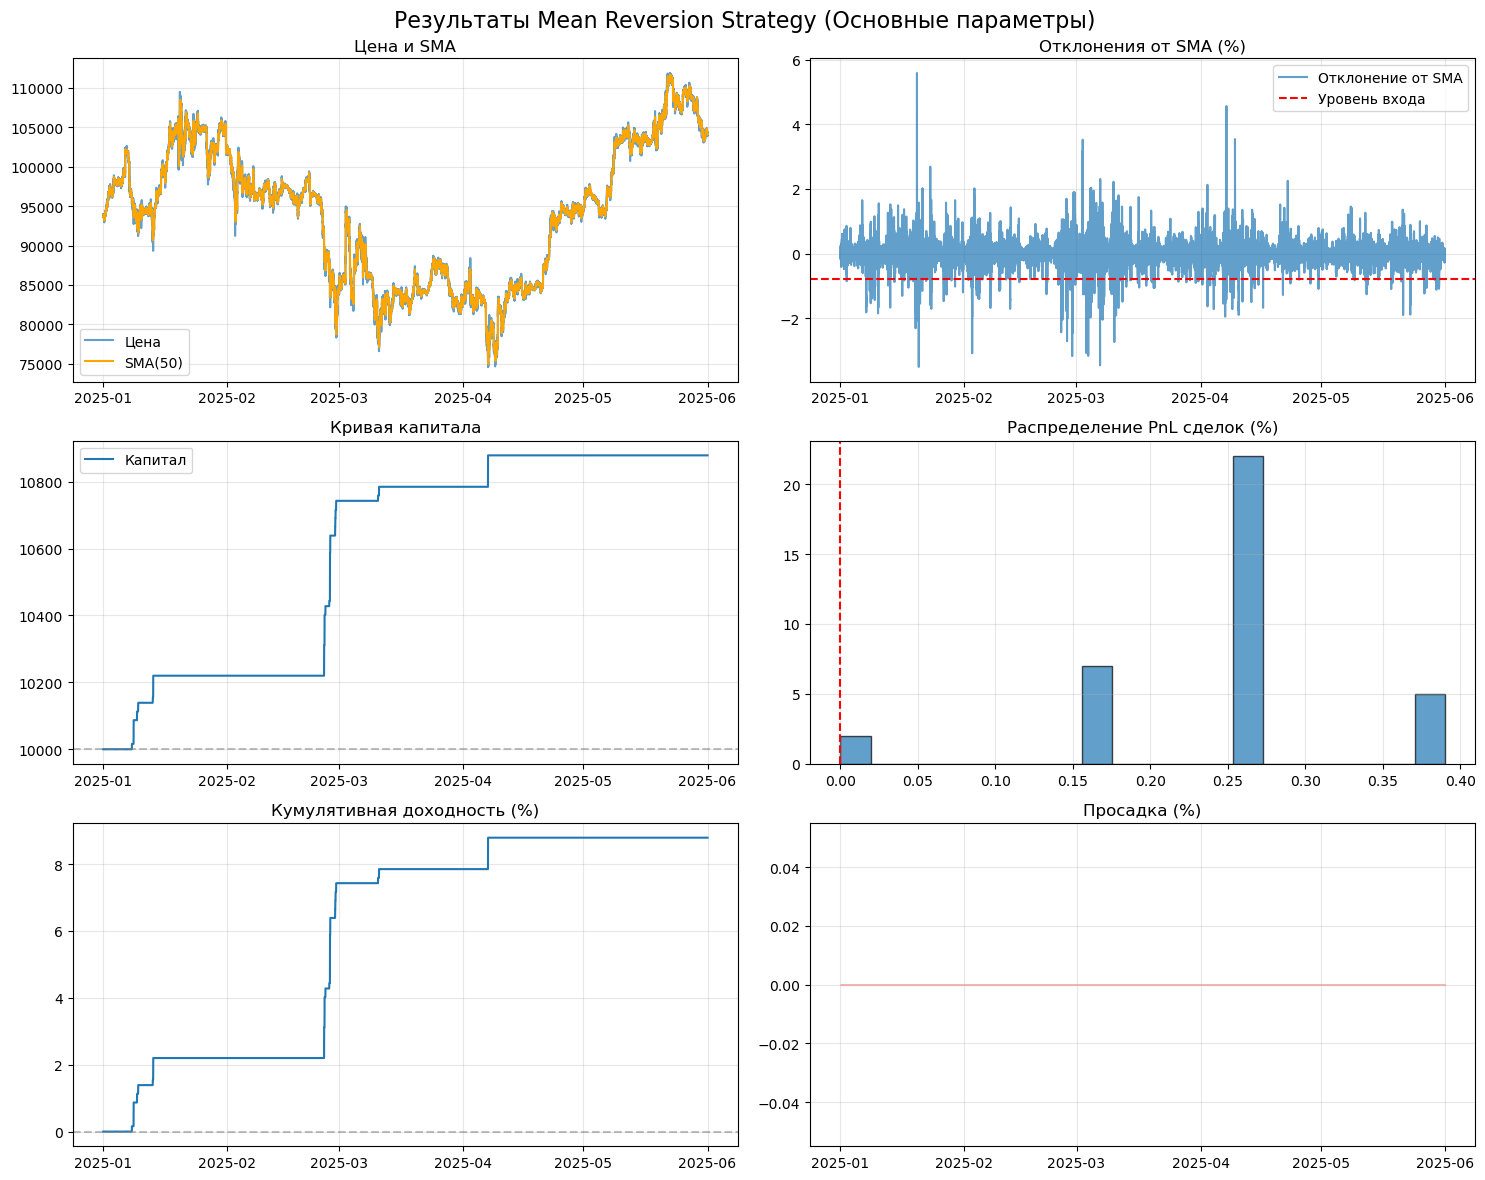

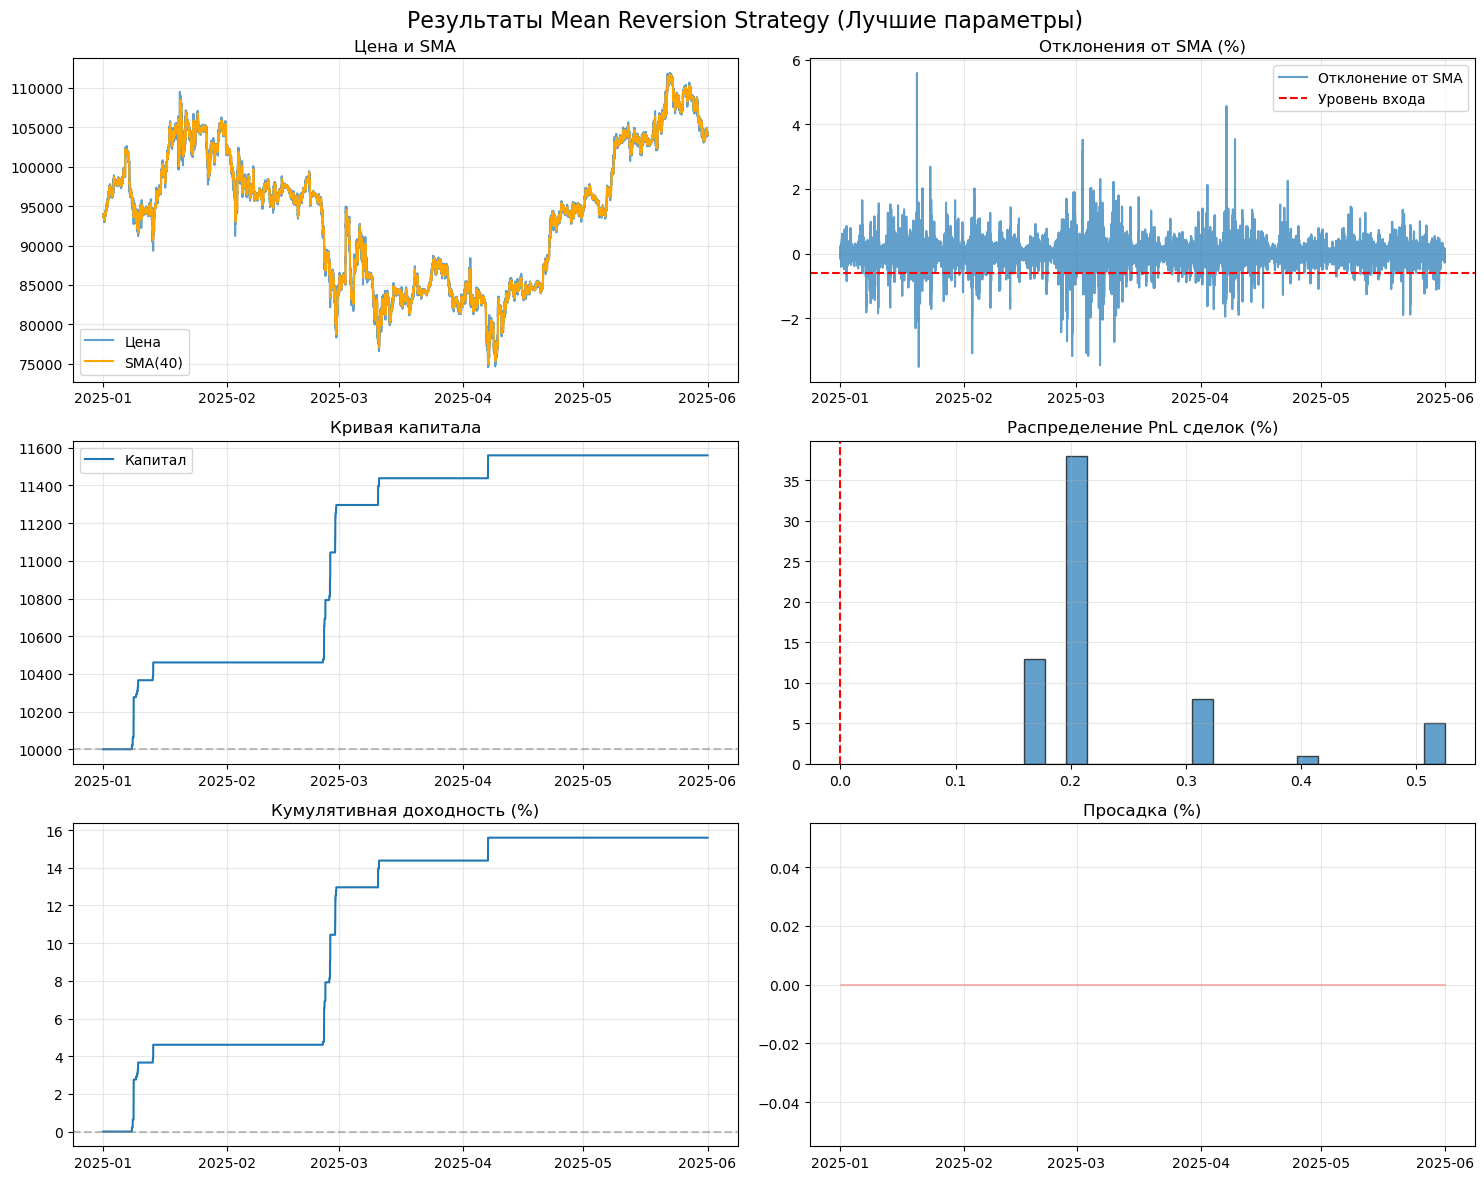


=== ТОП-5 ЛУЧШИХ КОМБИНАЦИЙ ПАРАМЕТРОВ ===
1. SMA=40, Entry=-0.6%, TP=0.2% | Profit Factor=inf, Return=15.60%
2. SMA=40, Entry=-0.6%, TP=0.3% | Profit Factor=inf, Return=17.22%
3. SMA=40, Entry=-0.6%, TP=0.4% | Profit Factor=inf, Return=18.27%
4. SMA=40, Entry=-0.6%, TP=0.4% | Profit Factor=inf, Return=20.07%
5. SMA=40, Entry=-0.7%, TP=0.2% | Profit Factor=inf, Return=18.77%


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# ПАРАМЕТРЫ СТРАТЕГИИ
# =============================================================================

# Основные параметры
ASSET = 'BTCUSDT'
TIMEFRAME = '1m'
START_DATE = '2025-01-01'
END_DATE = '2025-06-01'
INITIAL_CAPITAL = 10000
LEVERAGE = 5
TRADING_CAPITAL = INITIAL_CAPITAL * LEVERAGE  # 50000
COMMISSION_RATE = 0.0002  # 0.02%

# Параметры стратегии
SMA_PERIOD = 50
ENTRY_DEVIATION = -0.008  # -0.8% от SMA
ORDER_SPACING = 0.003  # 0.3% между ордерами
ORDER_VOLUMES = [0.2, 0.3, 0.5]  # 20%, 30%, 50% от капитала
INDIVIDUAL_TP = 0.003  # 0.3% тейк-профит для каждого ордера
GLOBAL_TP = 0.002  # 0.2% глобальный тейк-профит
STOP_LOSS = -0.03  # -3% стоп-лосс

# Параметры для оптимизации
PARAM_RANGES = {
    'sma_period': [40, 50, 60, 70],
    'entry_deviation': [-0.006, -0.007, -0.008, -0.009, -0.01],
    'individual_tp': [0.0025, 0.003, 0.0035, 0.004],
}

# =============================================================================
# ФУНКЦИИ АНАЛИЗА И БЕКТЕСТИНГА
# =============================================================================

def load_and_prepare_data(filename):
    """Загрузка и подготовка данных"""
    try:
        df = pd.read_csv(filename)
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.set_index('datetime')
        
        # Фильтрация по датам
        df = df[(df.index >= START_DATE) & (df.index < END_DATE)]
        
        # Расчет SMA
        df['sma'] = df['close'].rolling(window=SMA_PERIOD).mean()
        df['price_deviation'] = (df['close'] - df['sma']) / df['sma']
        
        return df
    except Exception as e:
        print(f"Ошибка при загрузке данных: {e}")
        return None

def test_stationarity(data, column='price_deviation'):
    """Тест стационарности ADF"""
    print("=== ТЕСТ СТАЦИОНАРНОСТИ (ADF) ===")
    
    # Удаляем NaN значения
    clean_data = data[column].dropna()
    
    # Проводим ADF тест
    result = adfuller(clean_data, autolag='AIC')
    
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("Результат: Ряд СТАЦИОНАРЕН (отвергаем нулевую гипотезу)")
    else:
        print("Результат: Ряд НЕ СТАЦИОНАРЕН (принимаем нулевую гипотезу)")
    
    return result

class MeanReversionStrategy:
    def __init__(self, data, sma_period=SMA_PERIOD, entry_deviation=ENTRY_DEVIATION, 
                 individual_tp=INDIVIDUAL_TP, order_spacing=ORDER_SPACING,
                 global_tp=GLOBAL_TP, stop_loss=STOP_LOSS):
        self.data = data.copy()
        self.sma_period = sma_period
        self.entry_deviation = entry_deviation
        self.individual_tp = individual_tp
        self.order_spacing = order_spacing
        self.global_tp = global_tp
        self.stop_loss = stop_loss
        
        # Пересчитываем SMA с новым периодом
        self.data['sma'] = self.data['close'].rolling(window=sma_period).mean()
        self.data['price_deviation'] = (self.data['close'] - self.data['sma']) / self.data['sma']
        
        # Переменные для отслеживания позиций
        self.reset_position()
        self.trades = []
        self.equity_curve = []
        
    def reset_position(self):
        """Сброс текущей позиции"""
        self.position = {
            'active': False,
            'orders': [],  # [{'price': float, 'volume': float, 'filled': bool}]
            'total_volume': 0,
            'average_price': 0,
            'entry_bar': None
        }
        
    def calculate_order_prices(self, current_price):
        """Расчет цен для лимитных ордеров"""
        order1_price = current_price * (1 + self.entry_deviation)
        order2_price = order1_price * (1 - self.order_spacing)
        order3_price = order2_price * (1 - self.order_spacing)
        
        return [order1_price, order2_price, order3_price]
    
    def place_orders(self, current_price, bar_index):
        """Размещение лимитных ордеров"""
        order_prices = self.calculate_order_prices(current_price)
        
        self.position['orders'] = []
        for i, (price, volume_pct) in enumerate(zip(order_prices, ORDER_VOLUMES)):
            volume = TRADING_CAPITAL * volume_pct / price
            self.position['orders'].append({
                'price': price,
                'volume': volume,
                'filled': False,
                'volume_pct': volume_pct
            })
        
        self.position['active'] = True
        self.position['entry_bar'] = bar_index
    
    def check_order_fills(self, row):
        """Проверка исполнения ордеров"""
        for order in self.position['orders']:
            if not order['filled'] and row['low'] <= order['price']:
                order['filled'] = True
                self.position['total_volume'] += order['volume']
                
                # Пересчет средней цены входа
                if self.position['total_volume'] > 0:
                    total_cost = sum([o['price'] * o['volume'] for o in self.position['orders'] if o['filled']])
                    self.position['average_price'] = total_cost / self.position['total_volume']
    
    def check_exit_conditions(self, row, bar_index):
        """Проверка условий выхода"""
        if not self.position['active'] or self.position['total_volume'] == 0:
            return
        
        # Не выходим в том же баре, где вошли
        if bar_index <= self.position['entry_bar']:
            return
        
        exit_price = None
        exit_reason = None
        partial_exit = False
        
        # 1. Индивидуальные тейк-профиты
        for order in self.position['orders']:
            if order['filled']:
                tp_price = order['price'] * (1 + self.individual_tp)
                if row['high'] >= tp_price:
                    # Частичный выход
                    self.record_trade(order['price'], tp_price, order['volume'], 
                                    f"Individual TP (Order {ORDER_VOLUMES.index(order['volume_pct'])+1})")
                    self.position['total_volume'] -= order['volume']
                    order['filled'] = False
                    partial_exit = True
        
        if partial_exit and self.position['total_volume'] <= 0:
            self.reset_position()
            return
        
        # 2. Глобальный тейк-профит
        if self.position['average_price'] > 0:
            global_tp_price = self.position['average_price'] * (1 + self.global_tp)
            if row['high'] >= global_tp_price:
                exit_price = global_tp_price
                exit_reason = "Global TP"
        
        # 3. Стоп-лосс (по первому ордеру)
        first_order = next((o for o in self.position['orders'] if o['filled']), None)
        if first_order:
            sl_price = first_order['price'] * (1 + self.stop_loss)
            if row['low'] <= sl_price:
                exit_price = sl_price
                exit_reason = "Stop Loss"
        
        # Выход из всей позиции
        if exit_price and self.position['total_volume'] > 0:
            self.record_trade(self.position['average_price'], exit_price, 
                            self.position['total_volume'], exit_reason)
            self.reset_position()
    
    def record_trade(self, entry_price, exit_price, volume, exit_reason):
        """Запись сделки"""
        pnl_before_commission = (exit_price - entry_price) * volume
        commission = (entry_price + exit_price) * volume * COMMISSION_RATE
        pnl_after_commission = pnl_before_commission - commission
        
        # Пересчет в процентах от первоначального капитала
        pnl_pct = (pnl_after_commission / INITIAL_CAPITAL) * 100
        
        trade = {
            'entry_price': entry_price,
            'exit_price': exit_price,
            'volume': volume,
            'pnl_gross': pnl_before_commission,
            'commission': commission,
            'pnl_net': pnl_after_commission,
            'pnl_pct': pnl_pct,
            'exit_reason': exit_reason
        }
        
        self.trades.append(trade)
    
    def run_backtest(self):
        """Запуск бектестинга"""
        self.trades = []
        self.equity_curve = []
        self.reset_position()
        
        equity = INITIAL_CAPITAL
        
        for i, (timestamp, row) in enumerate(self.data.iterrows()):
            # Пропускаем первые бары для расчета SMA
            if i < self.sma_period:
                self.equity_curve.append(equity)
                continue
            
            # Проверка условий входа
            if not self.position['active'] and not pd.isna(row['price_deviation']):
                if row['price_deviation'] <= self.entry_deviation:
                    self.place_orders(row['close'], i)
            
            # Проверка исполнения ордеров
            if self.position['active']:
                self.check_order_fills(row)
                self.check_exit_conditions(row, i)
            
            # Обновление кривой капитала
            current_pnl = sum([trade['pnl_net'] for trade in self.trades])
            equity = INITIAL_CAPITAL + current_pnl
            self.equity_curve.append(equity)
        
        return self.calculate_metrics()
    
    def calculate_metrics(self):
        """Расчет метрик производительности"""
        if not self.trades:
            return {
                'total_trades': 0,
                'total_return': 0,
                'total_return_pct': 0,
                'win_rate': 0,
                'profit_factor': 0,
                'max_drawdown': 0,
                'sharpe_ratio': 0
            }
        
        total_pnl = sum([trade['pnl_net'] for trade in self.trades])
        total_return_pct = (total_pnl / INITIAL_CAPITAL) * 100
        
        winning_trades = [t for t in self.trades if t['pnl_net'] > 0]
        losing_trades = [t for t in self.trades if t['pnl_net'] < 0]
        
        win_rate = len(winning_trades) / len(self.trades) * 100 if self.trades else 0
        
        gross_profit = sum([t['pnl_net'] for t in winning_trades]) if winning_trades else 0
        gross_loss = abs(sum([t['pnl_net'] for t in losing_trades])) if losing_trades else 0
        profit_factor = gross_profit / gross_loss if gross_loss > 0 else float('inf')
        
        # Максимальная просадка
        equity_curve = np.array(self.equity_curve)
        rolling_max = np.maximum.accumulate(equity_curve)
        drawdown = (equity_curve - rolling_max) / rolling_max * 100
        max_drawdown = abs(drawdown.min()) if len(drawdown) > 0 else 0
        
        # Коэффициент Шарпа (упрощенный)
        returns = np.diff(equity_curve) / equity_curve[:-1] * 100
        sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252 * 24 * 60) if np.std(returns) > 0 else 0
        
        return {
            'total_trades': len(self.trades),
            'total_return': total_pnl,
            'total_return_pct': total_return_pct,
            'win_rate': win_rate,
            'profit_factor': profit_factor,
            'max_drawdown': max_drawdown,
            'sharpe_ratio': sharpe_ratio,
            'winning_trades': len(winning_trades),
            'losing_trades': len(losing_trades)
        }

def optimize_parameters(data):
    """Оптимизация параметров"""
    print("\n=== ОПТИМИЗАЦИЯ ПАРАМЕТРОВ ===")
    
    best_result = None
    best_params = None
    all_results = []
    
    total_combinations = len(PARAM_RANGES['sma_period']) * len(PARAM_RANGES['entry_deviation']) * len(PARAM_RANGES['individual_tp'])
    current_combination = 0
    
    for sma_period in PARAM_RANGES['sma_period']:
        for entry_deviation in PARAM_RANGES['entry_deviation']:
            for individual_tp in PARAM_RANGES['individual_tp']:
                current_combination += 1
                print(f"Тестирование комбинации {current_combination}/{total_combinations}: "
                      f"SMA={sma_period}, Entry={entry_deviation:.1%}, TP={individual_tp:.1%}")
                
                try:
                    strategy = MeanReversionStrategy(
                        data, 
                        sma_period=sma_period,
                        entry_deviation=entry_deviation,
                        individual_tp=individual_tp
                    )
                    
                    metrics = strategy.run_backtest()
                    
                    # Критерий оптимизации: соотношение прибыль/убыток
                    if metrics['total_trades'] > 0:
                        score = metrics['profit_factor']
                        
                        result = {
                            'sma_period': sma_period,
                            'entry_deviation': entry_deviation,
                            'individual_tp': individual_tp,
                            'score': score,
                            'metrics': metrics
                        }
                        
                        all_results.append(result)
                        
                        if best_result is None or score > best_result['score']:
                            best_result = result
                            best_params = {
                                'sma_period': sma_period,
                                'entry_deviation': entry_deviation,
                                'individual_tp': individual_tp
                            }
                
                except Exception as e:
                    print(f"Ошибка при тестировании параметров: {e}")
    
    return best_params, best_result, all_results

def plot_results(data, strategy, title_suffix=""):
    """Визуализация результатов"""
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(f'Результаты Mean Reversion Strategy {title_suffix}', fontsize=16)
    
    # График цены и SMA
    axes[0, 0].plot(data.index, data['close'], label='Цена', alpha=0.7)
    axes[0, 0].plot(data.index, data['sma'], label=f'SMA({strategy.sma_period})', color='orange')
    axes[0, 0].set_title('Цена и SMA')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # График отклонений от SMA
    axes[0, 1].plot(data.index, data['price_deviation'] * 100, label='Отклонение от SMA', alpha=0.7)
    axes[0, 1].axhline(y=strategy.entry_deviation * 100, color='red', linestyle='--', label='Уровень входа')
    axes[0, 1].set_title('Отклонения от SMA (%)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Кривая капитала
    axes[1, 0].plot(data.index, strategy.equity_curve, label='Капитал')
    axes[1, 0].axhline(y=INITIAL_CAPITAL, color='gray', linestyle='--', alpha=0.5)
    axes[1, 0].set_title('Кривая капитала')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Распределение PnL сделок
    if strategy.trades:
        pnl_list = [trade['pnl_pct'] for trade in strategy.trades]
        axes[1, 1].hist(pnl_list, bins=20, alpha=0.7, edgecolor='black')
        axes[1, 1].axvline(x=0, color='red', linestyle='--')
        axes[1, 1].set_title('Распределение PnL сделок (%)')
        axes[1, 1].grid(True, alpha=0.3)
    
    # Кумулятивная доходность
    if strategy.equity_curve:
        cumulative_return = [(eq / INITIAL_CAPITAL - 1) * 100 for eq in strategy.equity_curve]
        axes[2, 0].plot(data.index, cumulative_return)
        axes[2, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        axes[2, 0].set_title('Кумулятивная доходность (%)')
        axes[2, 0].grid(True, alpha=0.3)
    
    # Просадка
    if strategy.equity_curve:
        equity_curve = np.array(strategy.equity_curve)
        rolling_max = np.maximum.accumulate(equity_curve)
        drawdown = (equity_curve - rolling_max) / rolling_max * 100
        axes[2, 1].fill_between(data.index, drawdown, 0, alpha=0.3, color='red')
        axes[2, 1].set_title('Просадка (%)')
        axes[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def print_metrics(metrics, title=""):
    """Вывод метрик"""
    print(f"\n=== МЕТРИКИ ПРОИЗВОДИТЕЛЬНОСТИ {title} ===")
    print(f"Общее количество сделок: {metrics['total_trades']}")
    print(f"Прибыльные сделки: {metrics['winning_trades']}")
    print(f"Убыточные сделки: {metrics['losing_trades']}")
    print(f"Винрейт: {metrics['win_rate']:.2f}%")
    print(f"Общая доходность: ${metrics['total_return']:.2f}")
    print(f"Общая доходность: {metrics['total_return_pct']:.2f}%")
    print(f"Profit Factor: {metrics['profit_factor']:.2f}")
    print(f"Максимальная просадка: {metrics['max_drawdown']:.2f}%")
    print(f"Коэффициент Шарпа: {metrics['sharpe_ratio']:.2f}")

# =============================================================================
# ОСНОВНОЙ КОД
# =============================================================================

def main():
    # Загрузка данных
    print("Загрузка данных...")
    filename = "BTCUSDT_1m_01012025_05062025.csv"  # Укажите правильный путь к файлу
    data = load_and_prepare_data(filename)
    
    if data is None:
        print("Не удалось загрузить данные. Проверьте путь к файлу.")
        return
    
    print(f"Загружено {len(data)} записей с {data.index[0]} по {data.index[-1]}")
    
    # Тест стационарности
    test_stationarity(data)
    
    # Бектестинг с основными параметрами
    print(f"\n=== БЕКТЕСТИНГ С ОСНОВНЫМИ ПАРАМЕТРАМИ ===")
    print(f"SMA период: {SMA_PERIOD}")
    print(f"Отклонение входа: {ENTRY_DEVIATION:.1%}")
    print(f"Индивидуальный TP: {INDIVIDUAL_TP:.1%}")
    
    main_strategy = MeanReversionStrategy(data)
    main_metrics = main_strategy.run_backtest()
    
    print_metrics(main_metrics, "ОСНОВНЫЕ ПАРАМЕТРЫ")
    
    # Оптимизация параметров
    best_params, best_result, all_results = optimize_parameters(data)
    
    if best_result:
        print(f"\n=== ЛУЧШИЕ ПАРАМЕТРЫ ===")
        print(f"SMA период: {best_params['sma_period']}")
        print(f"Отклонение входа: {best_params['entry_deviation']:.1%}")
        print(f"Индивидуальный TP: {best_params['individual_tp']:.1%}")
        
        # Бектестинг с лучшими параметрами
        best_strategy = MeanReversionStrategy(
            data,
            sma_period=best_params['sma_period'],
            entry_deviation=best_params['entry_deviation'],
            individual_tp=best_params['individual_tp']
        )
        
        best_metrics = best_strategy.run_backtest()
        print_metrics(best_metrics, "ЛУЧШИЕ ПАРАМЕТРЫ")
        
        # Визуализация результатов
        print("\nПостроение графиков...")
        plot_results(data, main_strategy, "(Основные параметры)")
        plot_results(data, best_strategy, "(Лучшие параметры)")
        
        # Топ-5 результатов оптимизации
        print("\n=== ТОП-5 ЛУЧШИХ КОМБИНАЦИЙ ПАРАМЕТРОВ ===")
        sorted_results = sorted(all_results, key=lambda x: x['score'], reverse=True)[:5]
        
        for i, result in enumerate(sorted_results, 1):
            print(f"{i}. SMA={result['sma_period']}, Entry={result['entry_deviation']:.1%}, "
                  f"TP={result['individual_tp']:.1%} | "
                  f"Profit Factor={result['score']:.2f}, "
                  f"Return={result['metrics']['total_return_pct']:.2f}%")
    
    else:
        print("Оптимизация не дала результатов.")
        plot_results(data, main_strategy, "(Основные параметры)")

if __name__ == "__main__":
    main()